installing the libraries

In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [5]:
plot_dir_path = 'plots'
if not os.path.exists(plot_dir_path):
    os.makedirs(plot_dir_path)
results_dir_path = 'results'
if not os.path.exists(results_dir_path):
    os.makedirs(results_dir_path)

    Importing the dataset

In [6]:
df = pd.read_csv('hotels_train.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [8]:
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [10]:
print("number of rows in the dataset: ", df.shape[0])
print("number of columns in the dataset: ", df.shape[1])

number of rows in the dataset:  27213
number of columns in the dataset:  18


convert columns with object type to int type

In [11]:
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)

In [12]:
df['purchase_type'].value_counts()

purchase_type
Online           14306
Offline           6501
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

In [13]:
df['room_type'].value_counts()

room_type
1    21084
4     4571
6      741
2      511
5      180
7      123
3        3
Name: count, dtype: int64

In [14]:
df['board_type'].value_counts()

board_type
half board      14591
full board       2697
breakfast        1753
not selected        4
Name: count, dtype: int64

In [15]:
# df['date'] = pd.to_datetime(df['date'], format = 'mixed')

In [16]:
# fix wrong date issues
np.where(df['date'] =='2018-2-29')

(array([  294,   389,  1048,  2872,  3398,  4753,  6521,  7110,  8039,
         9087,  9165,  9852, 11893, 13943, 14421, 14886, 16091, 18667,
        19680, 20142, 21605, 21898, 22095, 22115, 22153, 22940, 24593]),)

In [17]:
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')

In [18]:
df['date'] = pd.to_datetime(df['date'], format = 'mixed')

In [19]:
df['month'] = df['date'].dt.month.astype(int)

In [20]:
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']

In [21]:
df['purchase_type'] = df['purchase_type'].astype('category')
df['is_canceled'] = df['is_canceled'].astype('category')

In [22]:
df.describe()

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,date,month,n_guests
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000,27213.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494,2018-05-25 06:06:04.325873664,7.430456,1.951567
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2015-10-02 00:00:00,1.000000,1.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000,2018-02-28 00:00:00,5.000000,2.000000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000,2018-06-13 00:00:00,8.000000,2.000000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000,2018-09-19 00:00:00,10.000000,2.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000,2018-12-31 00:00:00,12.000000,12.000000
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566,NaN,3.061317,0.650540


In [23]:
df.describe(include = 'object')

,ID,board_type
count,27213,19045
unique,27213,4
top,INN09588,half board
freq,1,14591


In [24]:
df.isnull().sum()

ID                        0
weekend_nights            0
week_nights               0
room_type                 0
board_type             8168
n_adults                  0
n_less_12                 0
n_more_12                 0
booked_tour               0
n_requests                0
lead_time               419
purchase_type          4847
n_p_cacellation           0
n_p_not_cacellation       0
repeated                  0
price                  3405
date                      0
is_canceled               0
month                     0
n_guests                  0
dtype: int64

# Visualization


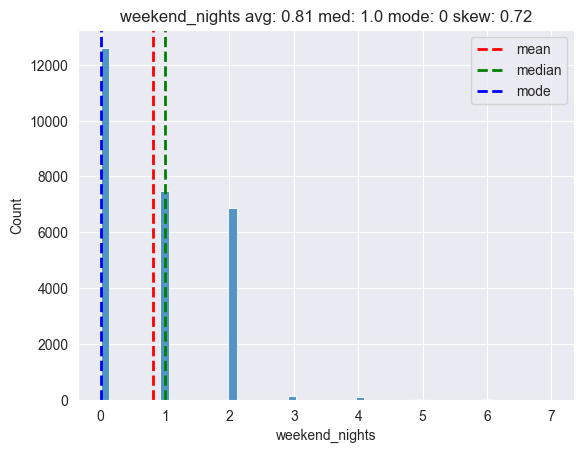

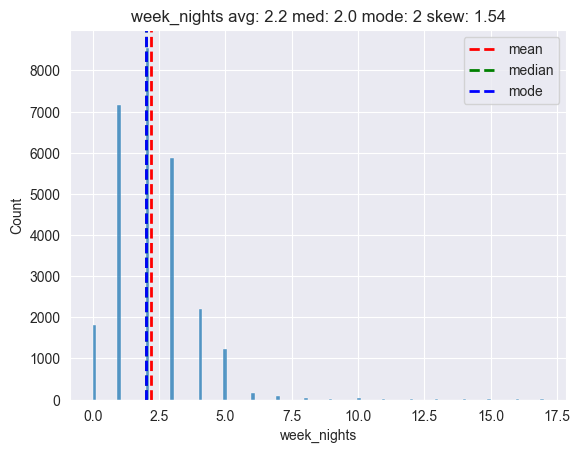

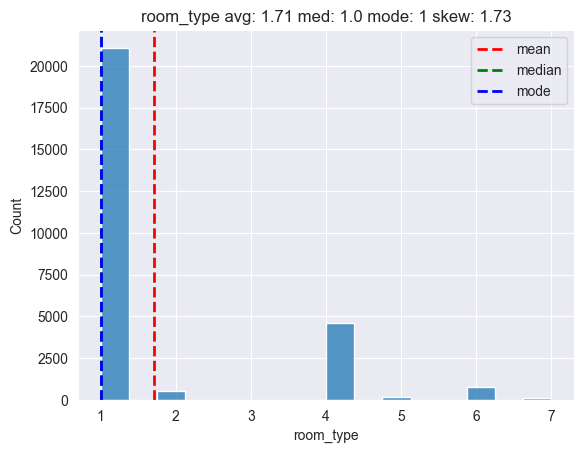

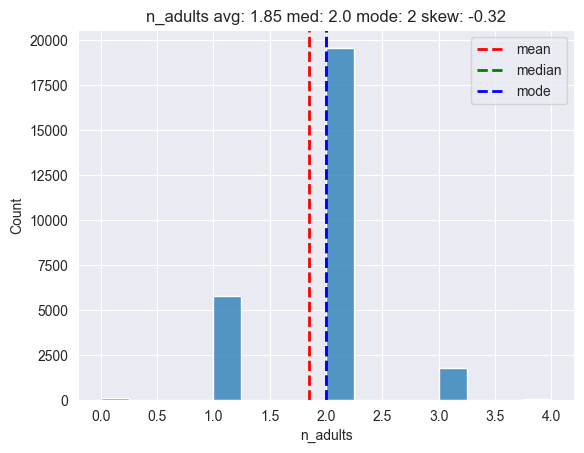

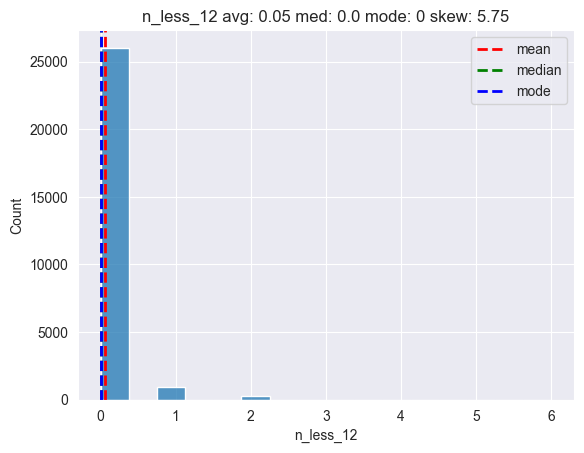

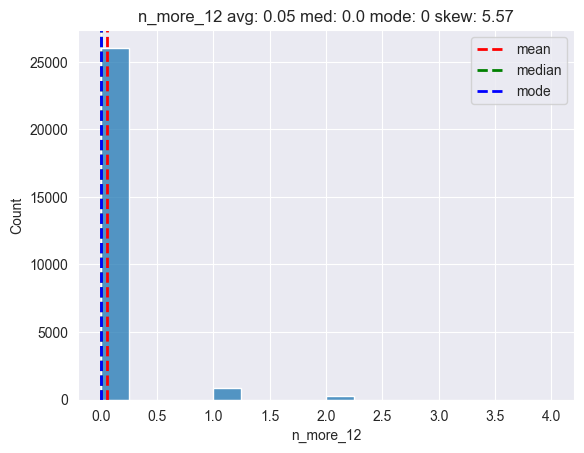

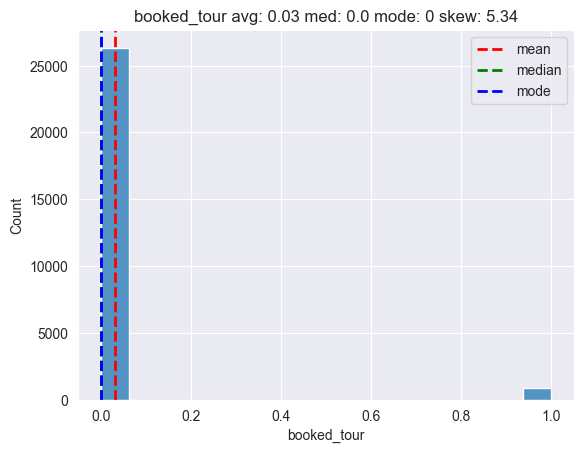

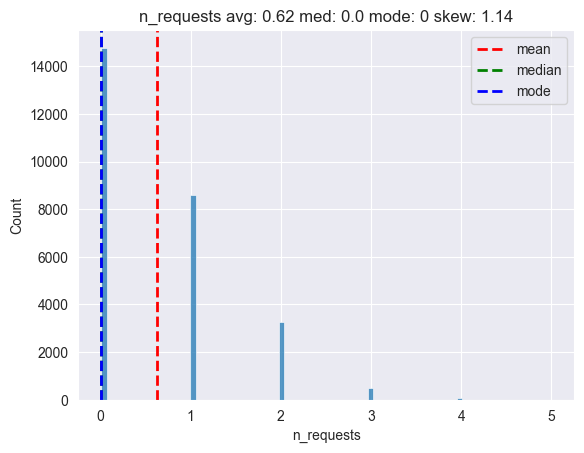

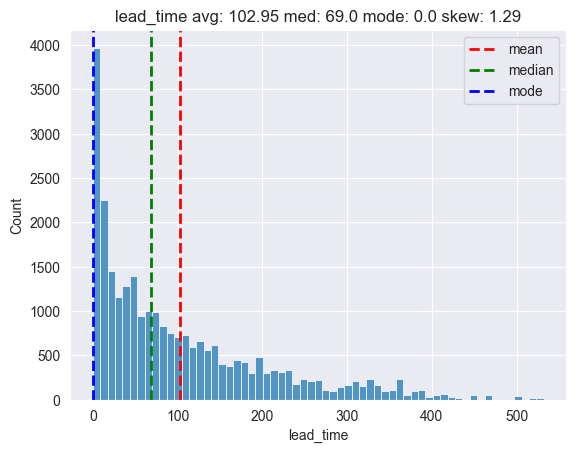

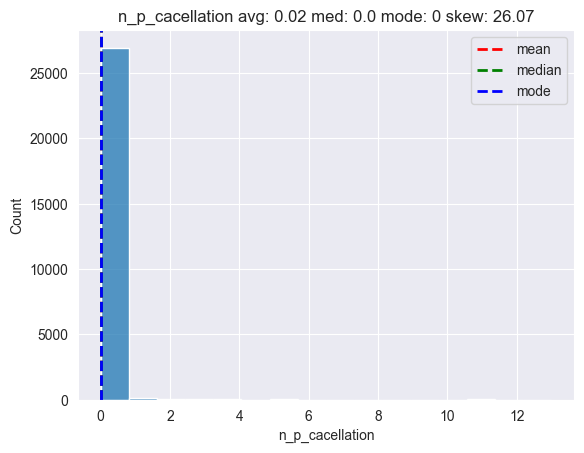

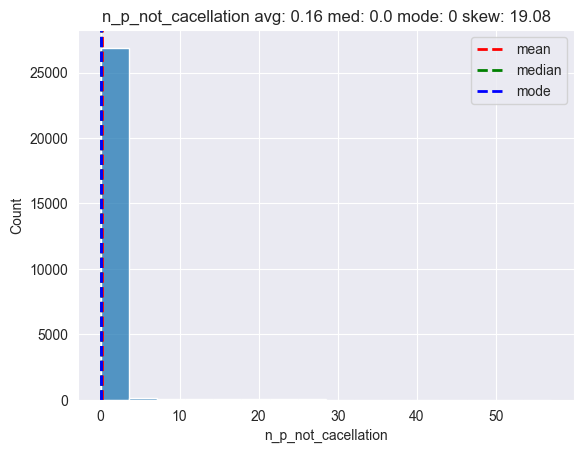

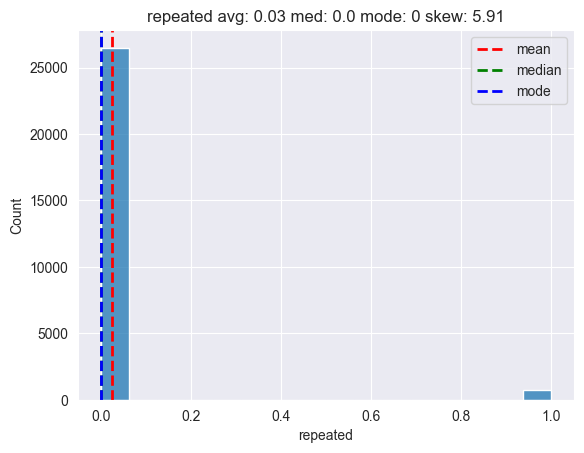

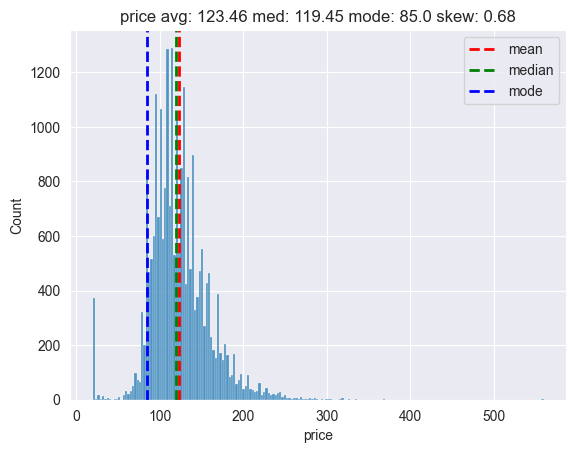

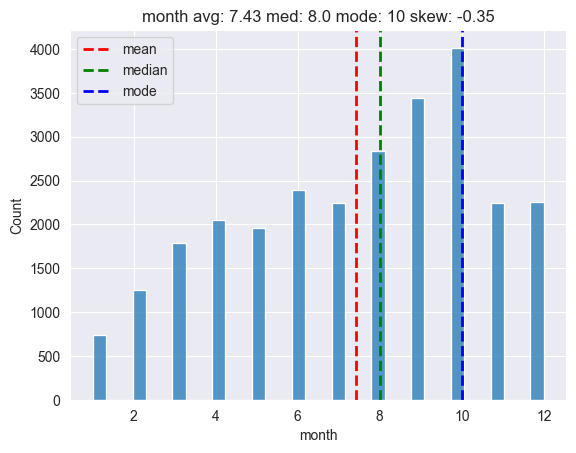

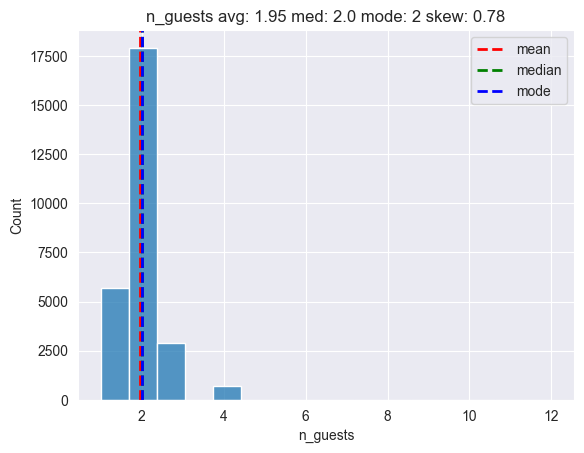

In [25]:
columns = df.columns
columns_to_plot = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
for col in columns_to_plot:
    sns.histplot(df[col])
    avg = df[col].mean()
    med = df[col].median()
    mode = df[col].mode()[0]
    skew = df[col].skew()
    plt.axvline(avg, color = 'r', linestyle = 'dashed', linewidth = 2, label = 'mean')
    plt.axvline(med, color = 'g', linestyle = 'dashed', linewidth = 2, label = 'median')
    plt.axvline(mode, color = 'b', linestyle = 'dashed', linewidth = 2, label = 'mode')
    plt.legend()
    plt.title(col + ' avg: ' + str(round(avg, 2)) + ' med: ' + str(round(med, 2)) + ' mode: ' + str(round(mode, 2)) + ' skew: ' + str(round(skew, 2)))
    plt.show()

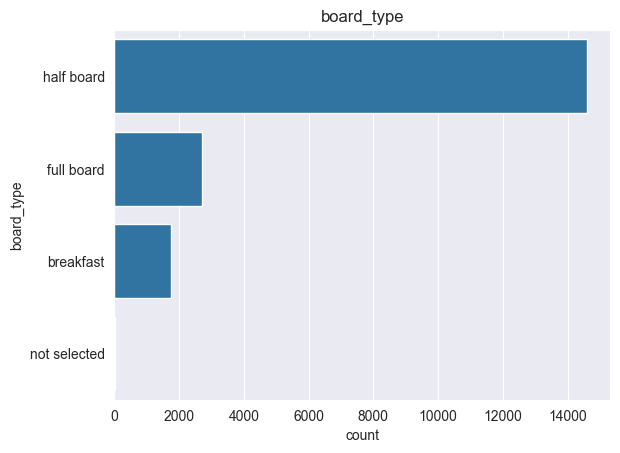

In [26]:
columns_to_plot = [col for col in columns if df[col].dtype == 'object' and col != 'ID' and col != 'date']
for col in columns_to_plot:
    sns.countplot(df[col])
    plt.title(col)
    plt.savefig('plots/' + col + '.png')
    plt.show()

Attributes correlation

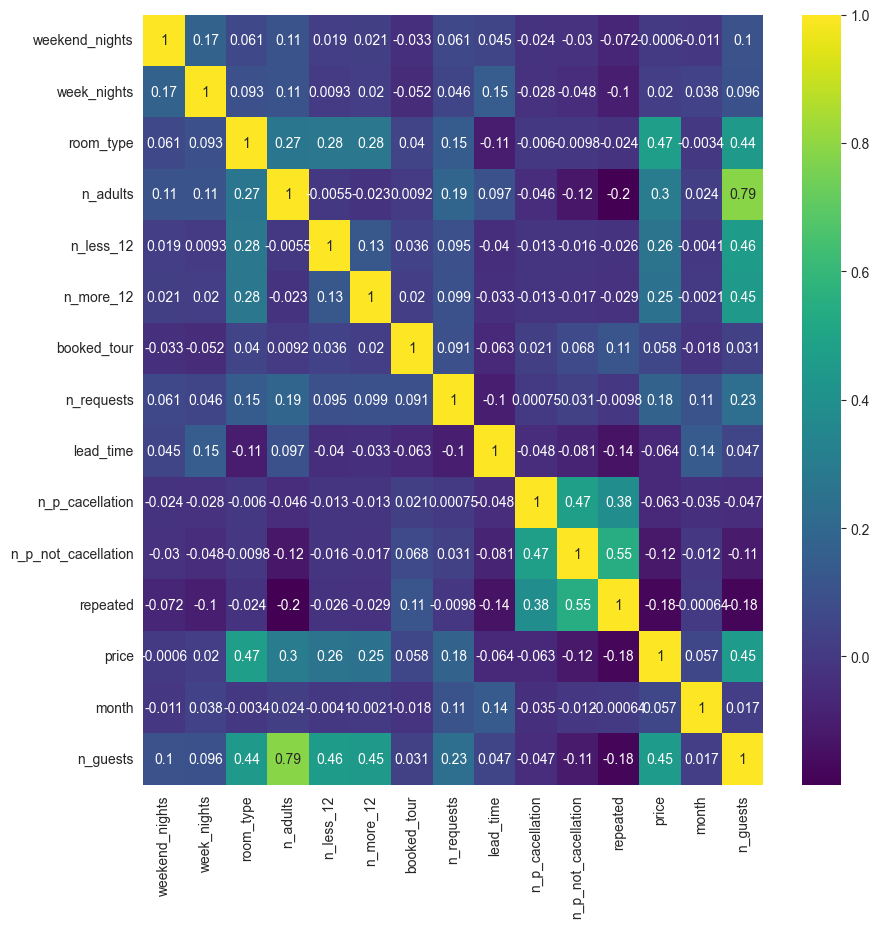

In [27]:
columns = df.columns
columns_to_corr = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
corr = df[columns_to_corr].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show()

Main insights:
cancellation:
- positively correlated with the lead time, and its reasonable as the more the lead time the more the chance of cancellation (unexpected events, change of plans, etc)
- negatively correlated with the number of requests, and its reasonable as the more the number of requests, the customer is more dependent on the hotel and less likely to cancel
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, the more satisfied he is and less likely to cancel
- positively correlated with the price, and its reasonable as the more the price the more the customer will be able to find a better deal and cancel

price:
- positively correlated with the room type, and its reasonable as the room is better the price is higher
- positively correlated with the number of guests, and its reasonable as the more the guests the more the price
- positively correlated with the number of requests, and its reasonable as the more the requests the more the price
- negatively correlated with the number of repeated times, and its reasonable as the more the customer repeats the reservation, he likely to get a discount
room type:
- positively correlated with the number of guests, and its reasonable as the more the guests the bigger the room

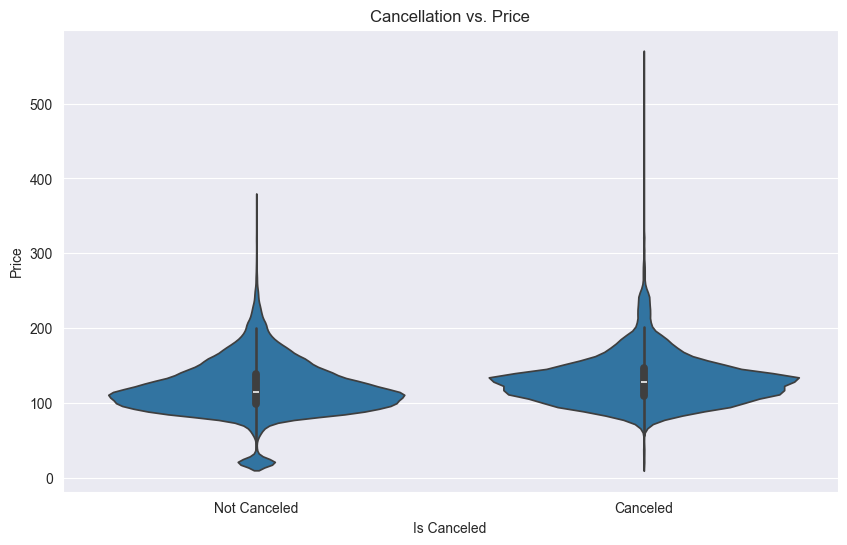

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_canceled', y='price', data=df)
plt.title('Cancellation vs. Price')
plt.xlabel('Is Canceled')
plt.ylabel('Price')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.savefig('plots/cancellation_vs_price_violin.png')
plt.show()

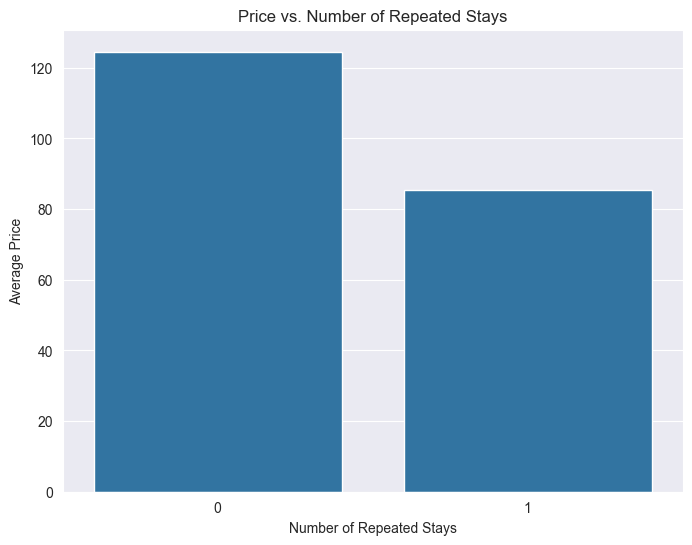

In [29]:
# Group by 'repeated' and calculate the average price
avg_price_repeated = df.groupby('repeated')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='repeated', y='price', data=avg_price_repeated)
plt.title('Price vs. Number of Repeated Stays')
plt.xlabel('Number of Repeated Stays')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.savefig('plots/price_vs_repeated_bar.png')
plt.show()

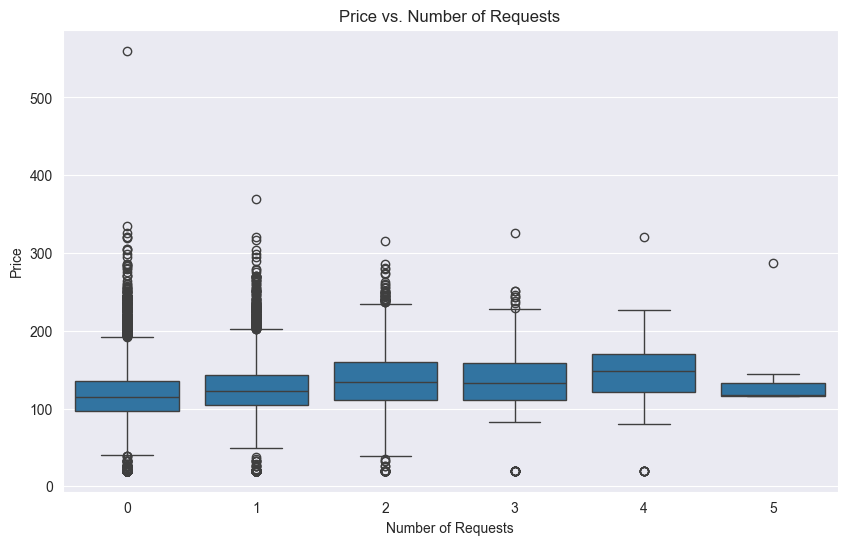

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_requests', y='price', data=df)
plt.title('Price vs. Number of Requests')
plt.xlabel('Number of Requests')
plt.ylabel('Price')
plt.show()

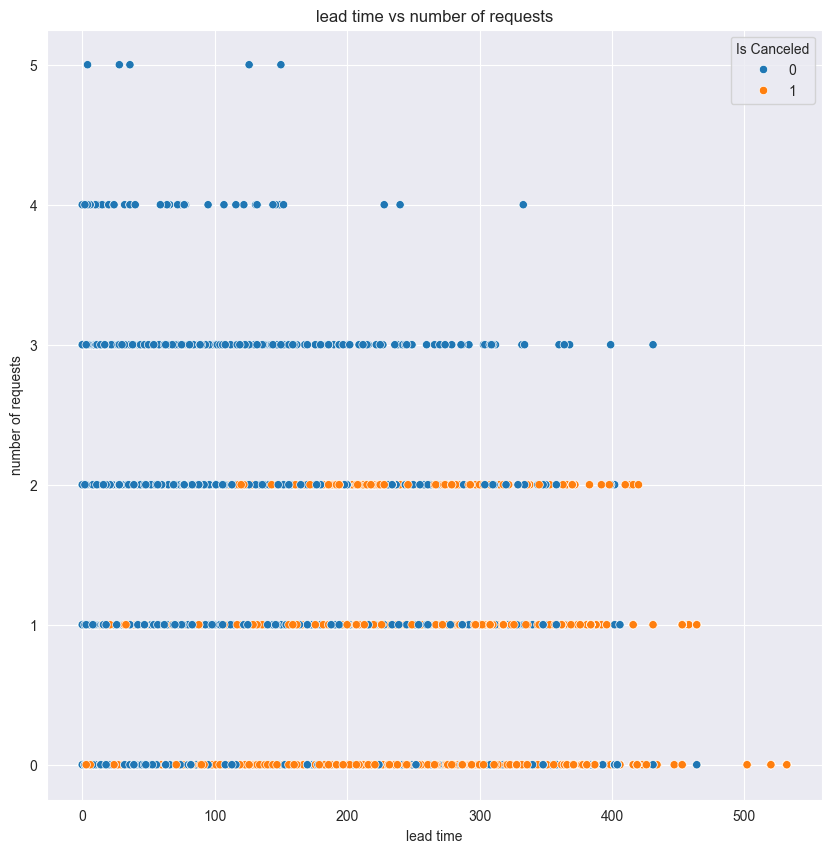

In [31]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='n_requests', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('number of requests')
plt.title('lead time vs number of requests')
plt.legend(title='Is Canceled')
plt.show()

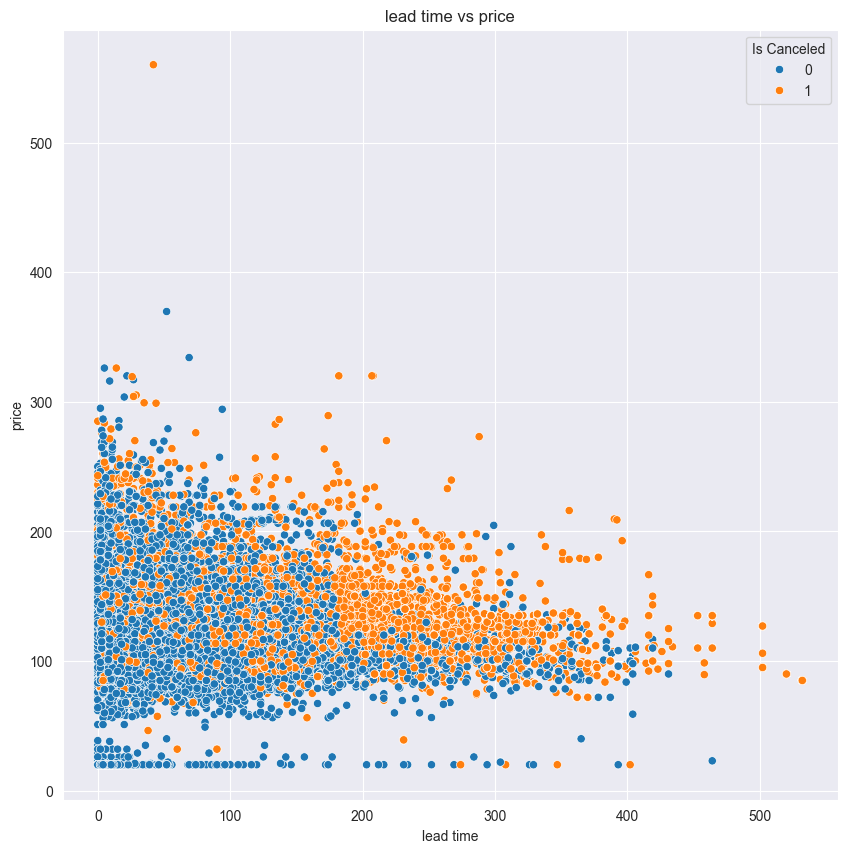

In [32]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='lead_time', y='price', hue='is_canceled', data=df)
plt.xlabel('lead time')
plt.ylabel('price')
plt.title('lead time vs price')
plt.legend(title='Is Canceled')
plt.show()

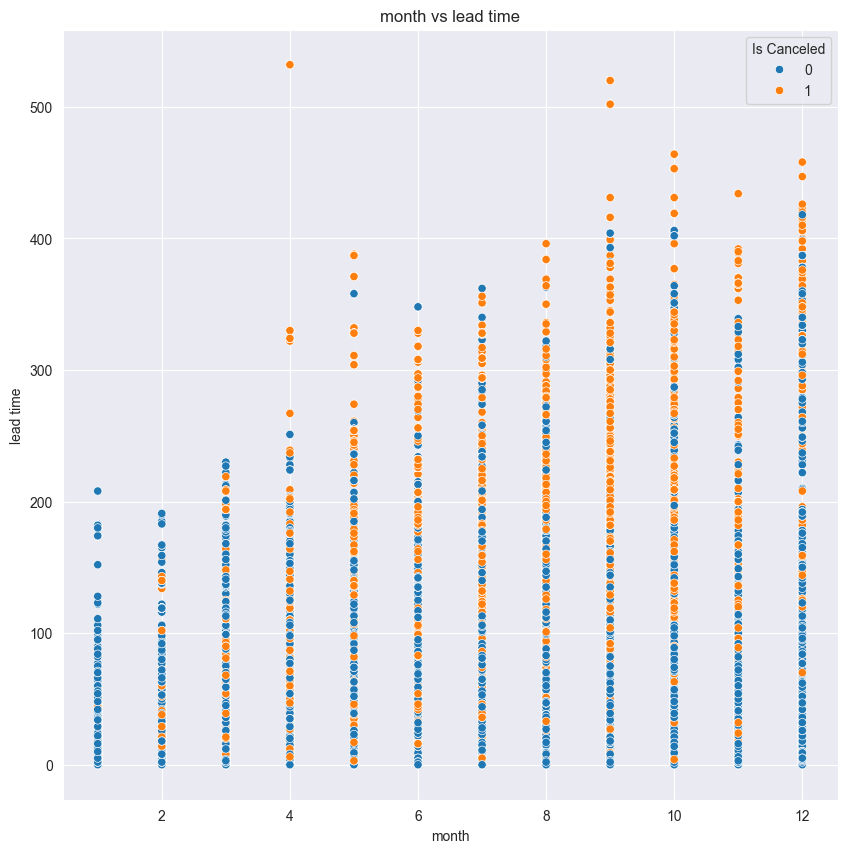

In [33]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='month', y='lead_time', hue='is_canceled', data=df)
plt.xlabel('month')
plt.ylabel('lead time')
plt.title('month vs lead time')
plt.legend(title='Is Canceled')
plt.savefig('plots/month_vs_lead_time.png')
plt.show()

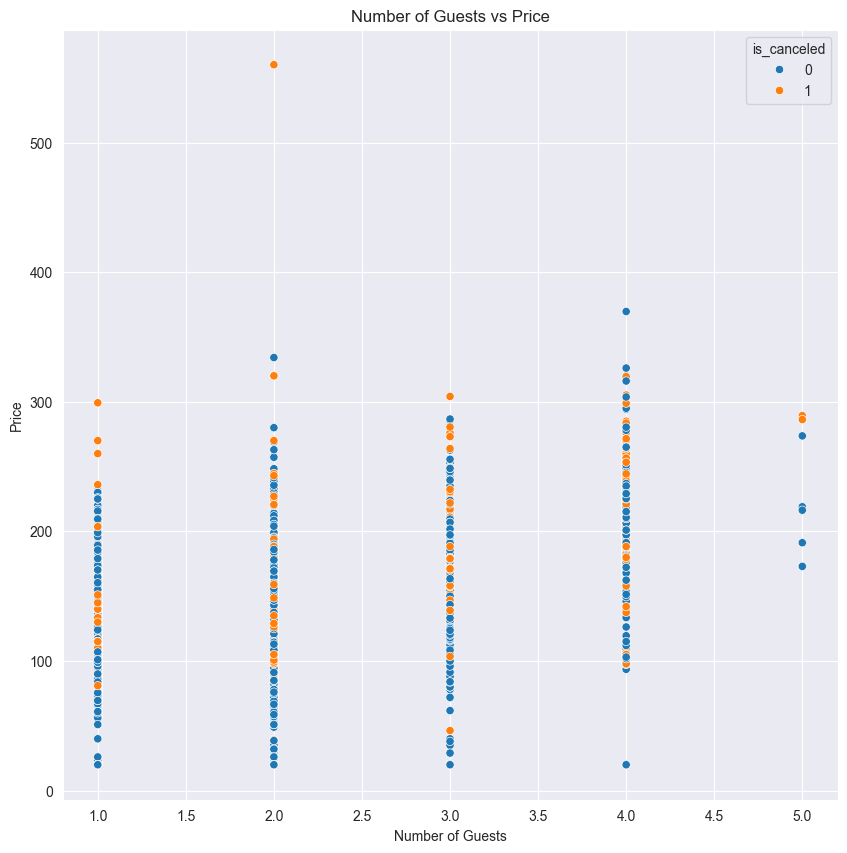

In [34]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_guests', y='price', hue='is_canceled', data=df)
plt.title('Number of Guests vs Price')
plt.xlabel('Number of Guests')
plt.ylabel('Price')
plt.show()

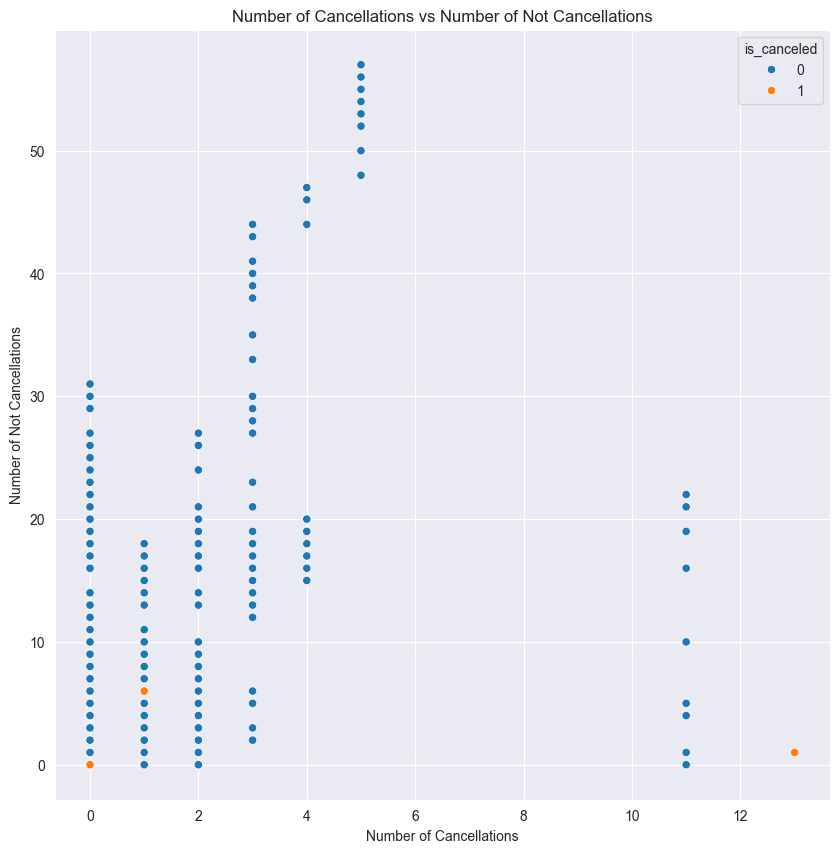

In [35]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='n_p_cacellation', y='n_p_not_cacellation', hue='is_canceled', data=df)
plt.title('Number of Cancellations vs Number of Not Cancellations')
plt.xlabel('Number of Cancellations')
plt.ylabel('Number of Not Cancellations')
plt.show()

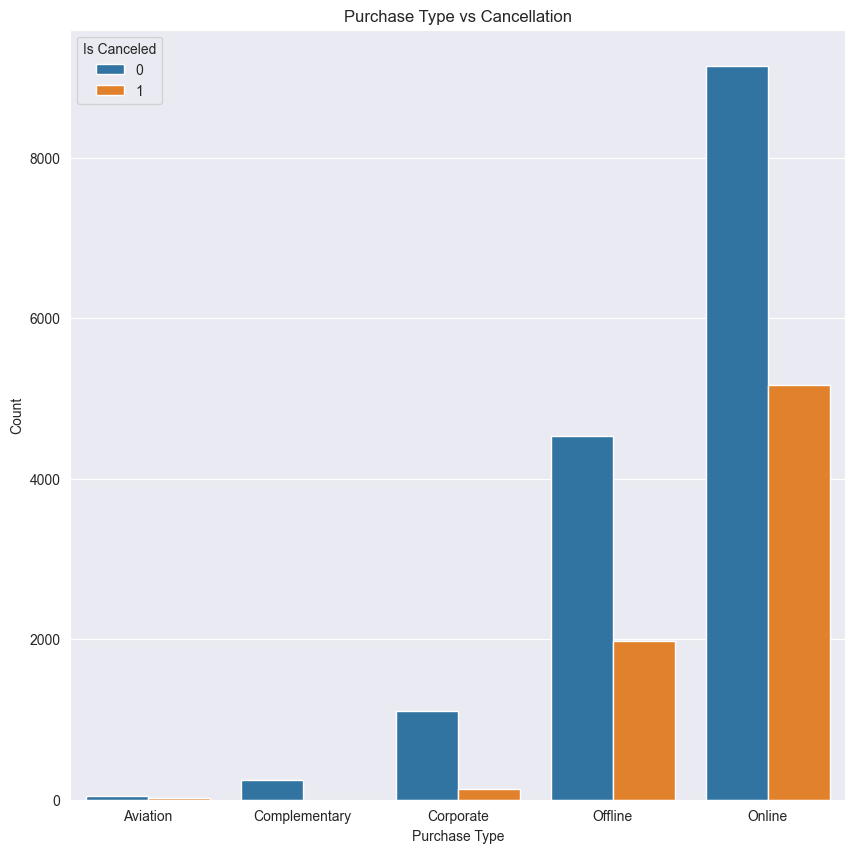

In [36]:
plt.figure(figsize=(10, 10))
sns.countplot(x='purchase_type', hue='is_canceled', data=df)
plt.title('Purchase Type vs Cancellation')
plt.xlabel('Purchase Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

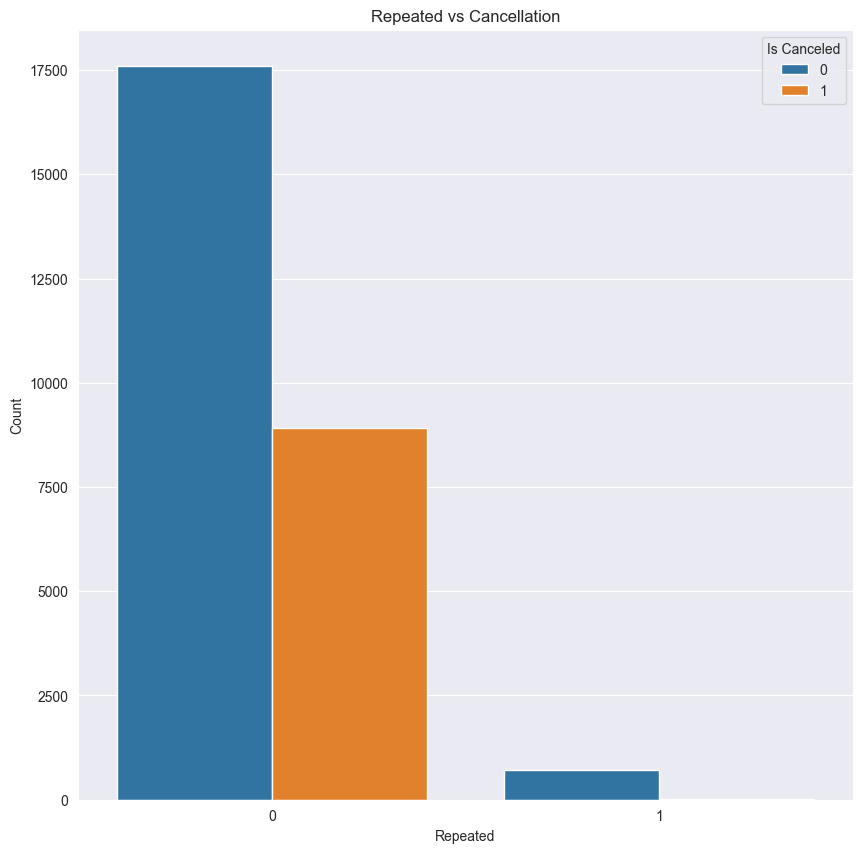

In [37]:
plt.figure(figsize=(10, 10))
sns.countplot(x='repeated', hue='is_canceled', data=df)
plt.title('Repeated vs Cancellation')
plt.xlabel('Repeated')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

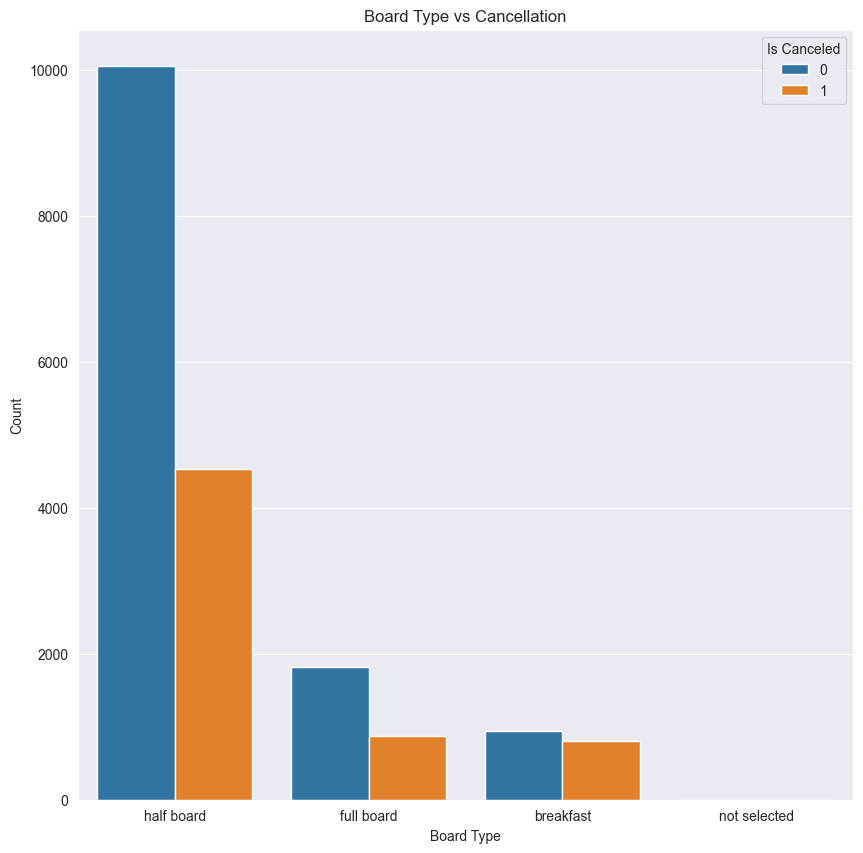

In [38]:
plt.figure(figsize=(10, 10))
sns.countplot(x='board_type', hue='is_canceled', data=df)
plt.title('Board Type vs Cancellation')
plt.xlabel('Board Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

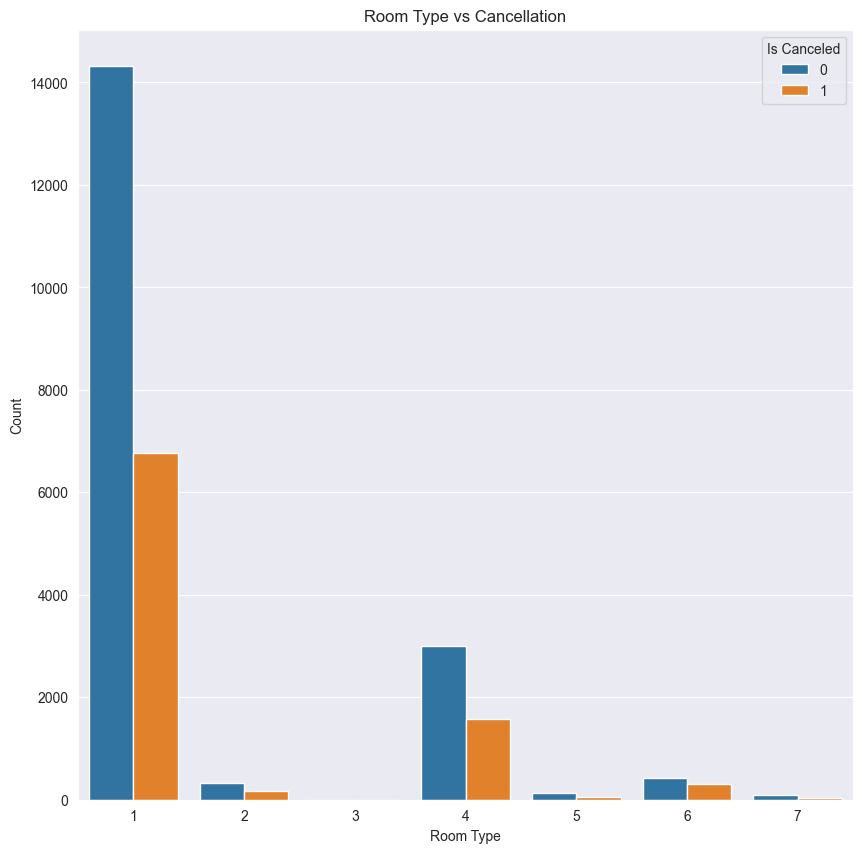

In [39]:
plt.figure(figsize=(10, 10))
sns.countplot(x='room_type', hue='is_canceled', data=df)
plt.title('Room Type vs Cancellation')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

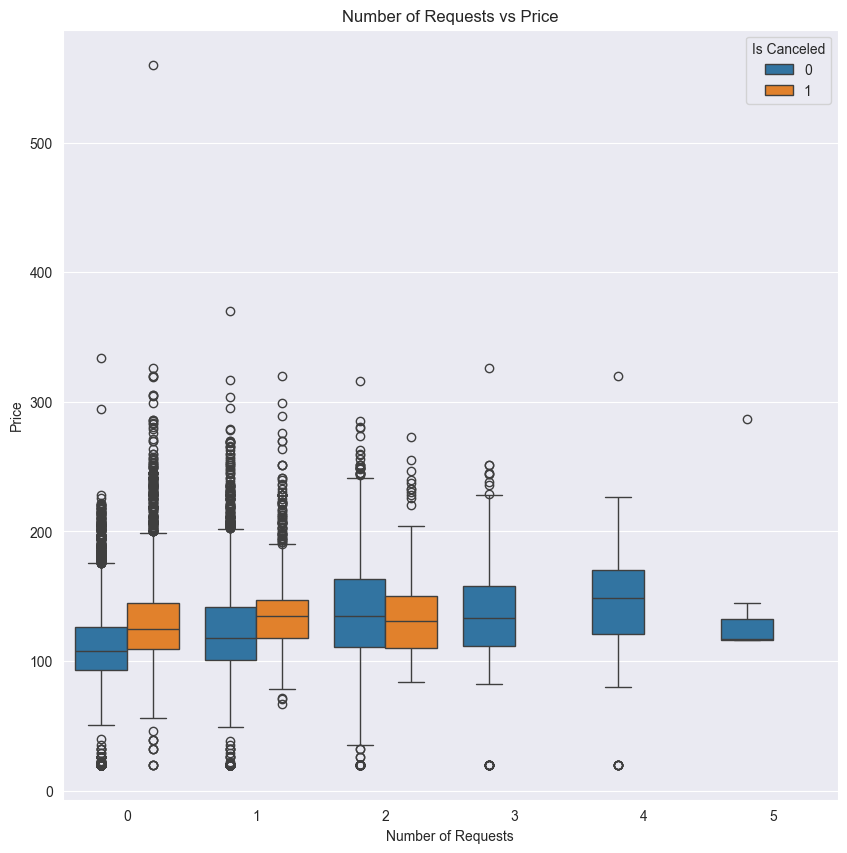

In [40]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='n_requests', y='price', hue='is_canceled', data=df)
plt.title('Number of Requests vs Price')
plt.xlabel('Number of Requests')
plt.ylabel('Price')
plt.legend(title='Is Canceled')
plt.show()

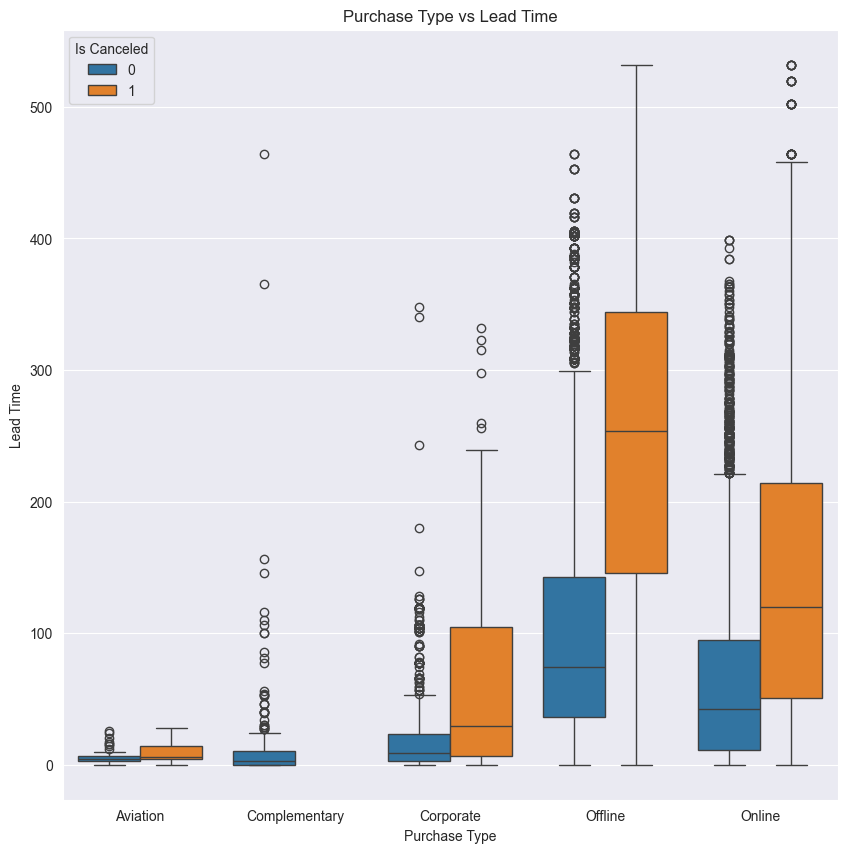

In [41]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='purchase_type', y='lead_time', hue='is_canceled', data=df)
plt.title('Purchase Type vs Lead Time')
plt.xlabel('Purchase Type')
plt.ylabel('Lead Time')
plt.legend(title='Is Canceled')
plt.show()

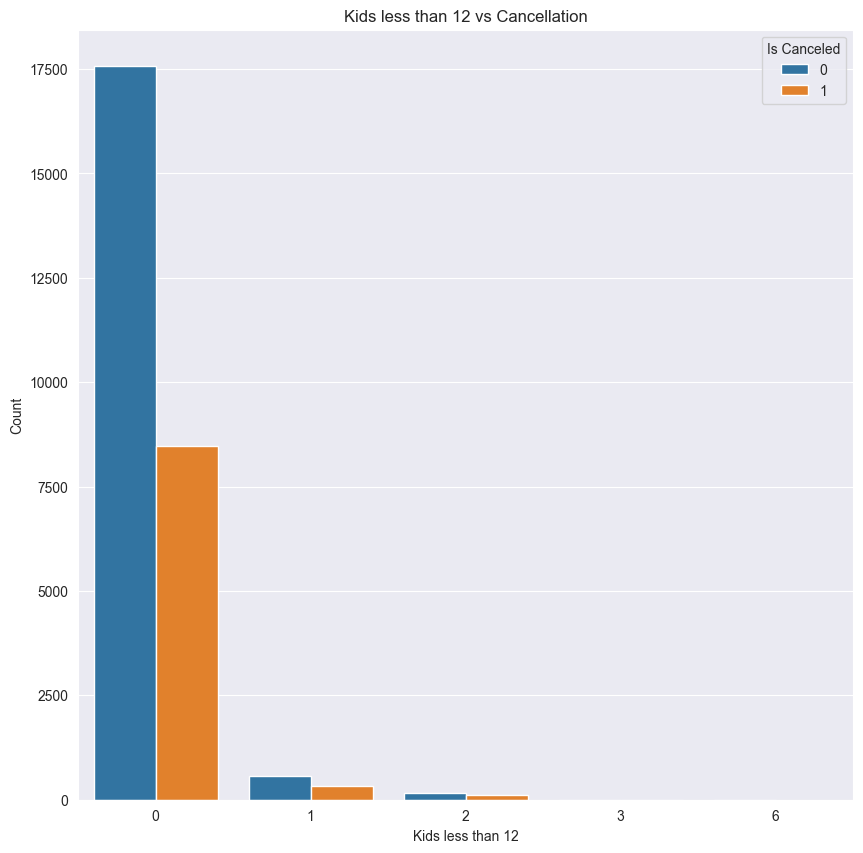

In [42]:
plt.figure(figsize=(10, 10))
sns.countplot(x='n_less_12', hue='is_canceled', data=df)
plt.title('Kids less than 12 vs Cancellation')
plt.xlabel('Kids less than 12')
plt.ylabel('Count')
plt.legend(title='Is Canceled')
plt.show()

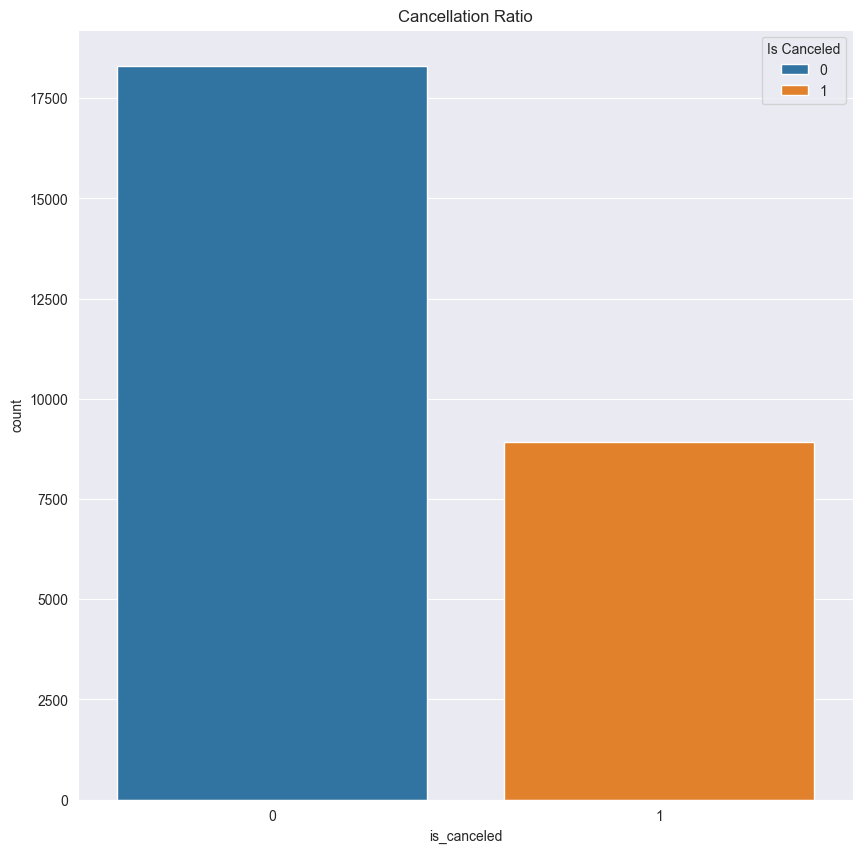

In [43]:
plt.figure(figsize=(10, 10))
sns.countplot(x='is_canceled', hue='is_canceled', data=df)
plt.title('Cancellation Ratio')
plt.legend(title='Is Canceled')
plt.show()

# Adding new features

In [44]:
#add total nights column
df['total_nights'] = df['weekend_nights'] + df['week_nights']

In [45]:
#add has kids column
df['has_kids'] = ((df['n_less_12'] > 0) | (df['n_more_12'] > 0)).astype(int)

In [46]:
#add check in day column
# Convert reservation_date to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate check-in date by adding lead_time to reservation_date
df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')

# Extract the day of the week for check-in date
df['check_in_day'] = df['check_in_date'].dt.day_name()

/Users/almog/PycharmProjects/Data_Mining_Final_Project/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)
/Users/almog/PycharmProjects/Data_Mining_Final_Project/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in multiply
  return bound(*args, **kwds)


In [47]:
#add check in month column
df['check_in_month'] = df['check_in_date'].dt.month


In [48]:
df['previous_cancellation_rate'] = (df['n_p_cacellation'] / (df['n_p_cacellation'] + df['n_p_not_cacellation'])).round(2)
df['previous_cancellation_rate'] = df['previous_cancellation_rate'].fillna(0)



In [49]:
df['is_holiday_season'] = np.where(df['check_in_month'].isin([12, 1, 7, 8]), 1, 0)

### Visualizing the new features

In [50]:
df['has_kids'] = df['has_kids'].astype(bool)
df['is_canceled'] =df['is_canceled'].astype(bool)

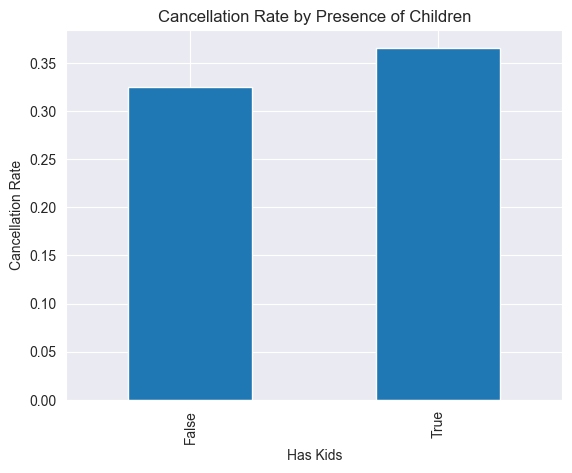

In [51]:
cancellation_rate_by_kids = df.groupby('has_kids')['is_canceled'].mean()
cancellation_rate_by_kids.plot(kind='bar', title='Cancellation Rate by Presence of Children')
plt.xlabel('Has Kids')
plt.ylabel('Cancellation Rate')
plt.show()

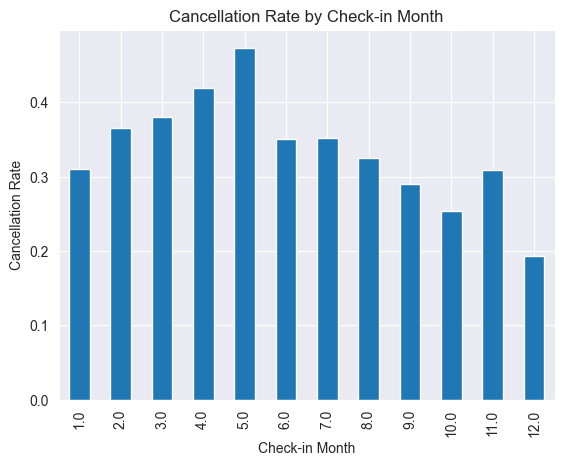

In [52]:
cancellation_rate_by_month = df.groupby('check_in_month')['is_canceled'].mean()
cancellation_rate_by_month.plot(kind='bar', title='Cancellation Rate by Check-in Month')
plt.xlabel('Check-in Month')
plt.ylabel('Cancellation Rate')
plt.show()

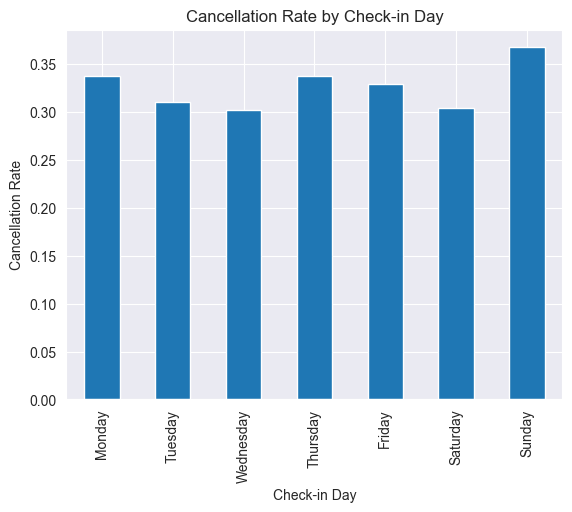

In [53]:
cancellation_rate_by_day = df.groupby('check_in_day')['is_canceled'].mean()
cancellation_rate_by_day = cancellation_rate_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
cancellation_rate_by_day.plot(kind='bar', title='Cancellation Rate by Check-in Day')
plt.xlabel('Check-in Day')
plt.ylabel('Cancellation Rate')
plt.show()

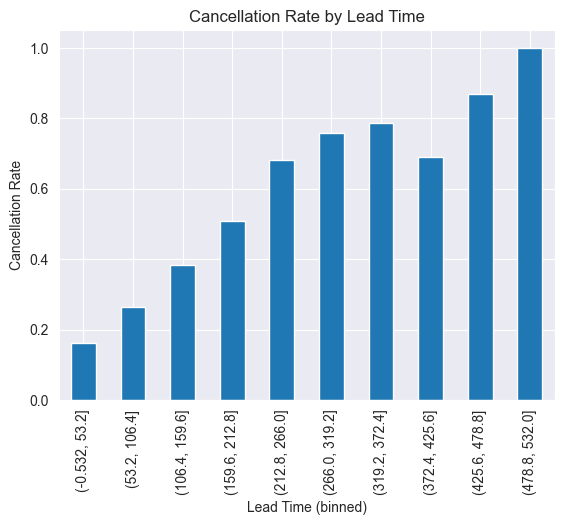

In [54]:
df['lead_time_bins'] = pd.cut(df['lead_time'], bins=10)
cancellation_rate_by_lead_time = df.groupby('lead_time_bins',observed=True)['is_canceled'].mean()
cancellation_rate_by_lead_time.plot(kind='bar', title='Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (binned)')
plt.ylabel('Cancellation Rate')
plt.show()

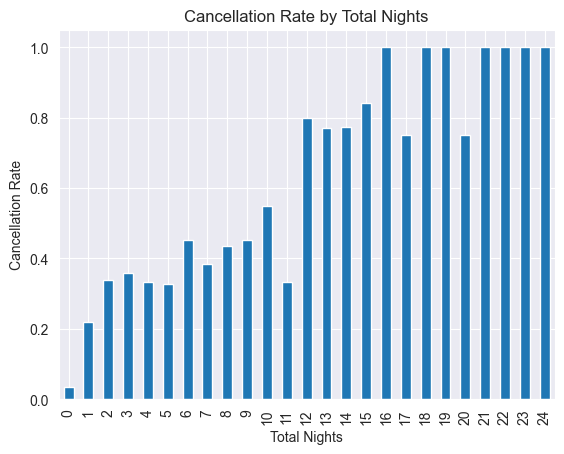

In [55]:
df['total_nights'] = df['weekend_nights'] + df['week_nights']
cancellation_rate_by_total_nights = df.groupby('total_nights')['is_canceled'].mean()
cancellation_rate_by_total_nights.plot(kind='bar', title='Cancellation Rate by Total Nights')
plt.xlabel('Total Nights')
plt.ylabel('Cancellation Rate')
plt.show()

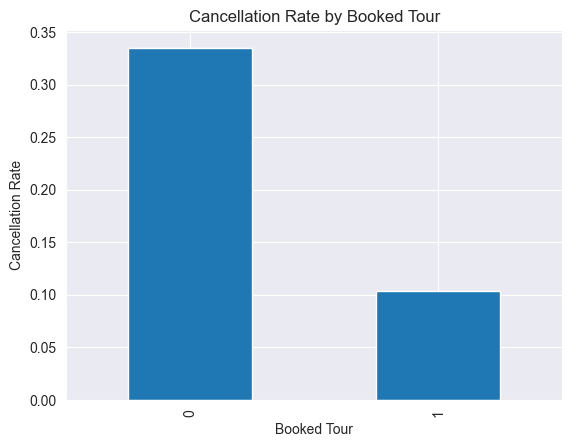

In [56]:
cancellation_rate_by_tour = df.groupby('booked_tour')['is_canceled'].mean()
cancellation_rate_by_tour.plot(kind='bar', title='Cancellation Rate by Booked Tour')
plt.xlabel('Booked Tour')
plt.ylabel('Cancellation Rate')
plt.show()

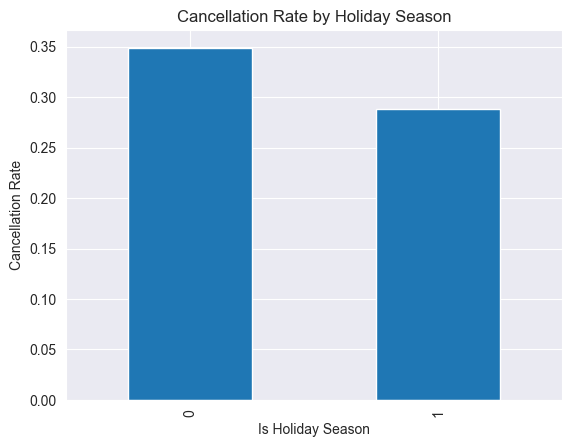

In [57]:
cancellation_rate_by_holiday = df.groupby('is_holiday_season')['is_canceled'].mean()
cancellation_rate_by_holiday.plot(kind='bar', title='Cancellation Rate by Holiday Season')
plt.xlabel('Is Holiday Season')
plt.ylabel('Cancellation Rate')
plt.show()

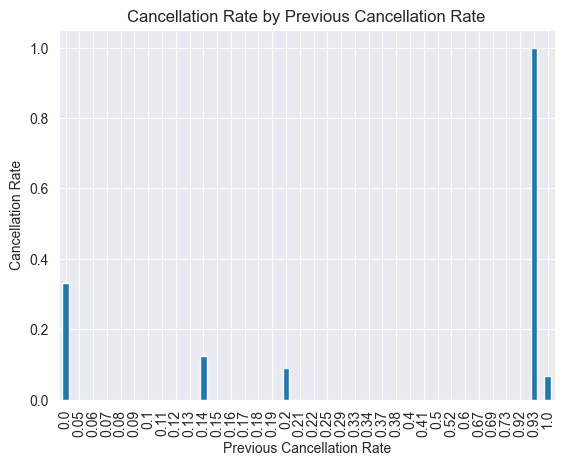

In [58]:
cancellation_rate_by_previous_cancellation_rate = df.groupby('previous_cancellation_rate')['is_canceled'].mean()
cancellation_rate_by_previous_cancellation_rate.plot(kind='bar', title='Cancellation Rate by Previous Cancellation Rate')
plt.xlabel('Previous Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.show()

check correlation between the new features and other features

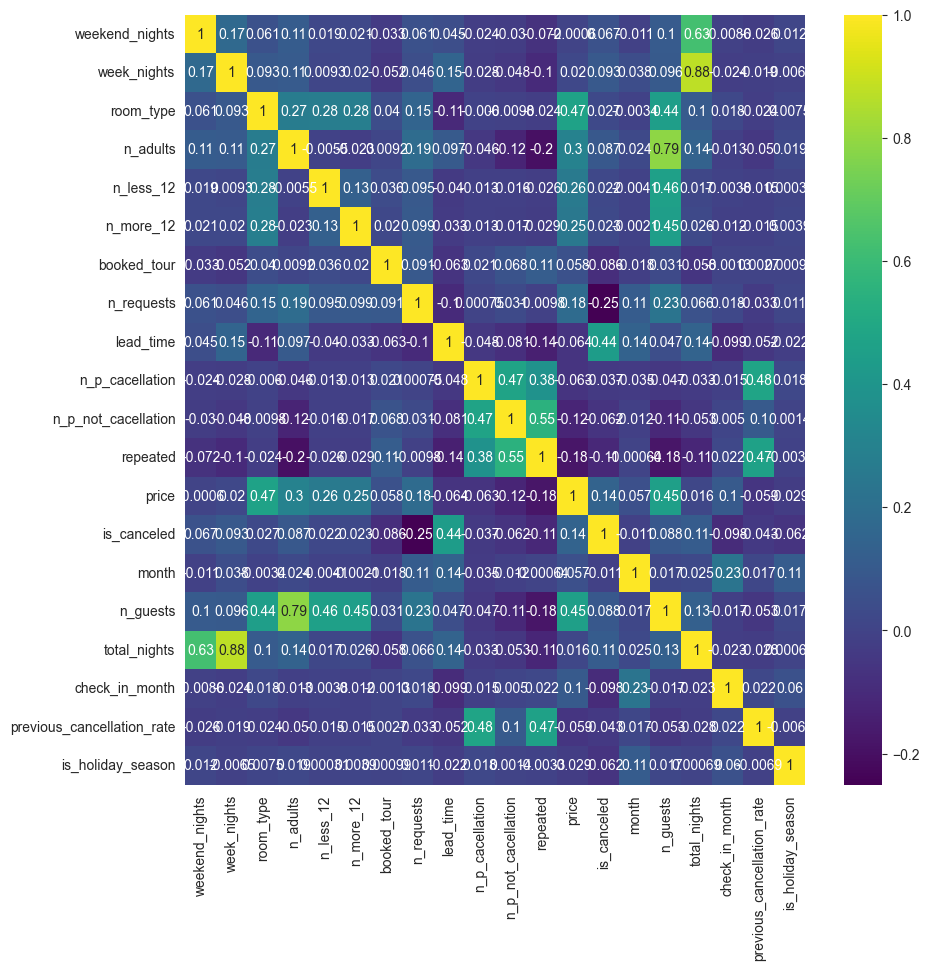

In [59]:
columns = df.columns
df['is_canceled'] = df['is_canceled'].astype('int')
columns_to_corr = [col for col in columns if df[col].dtype == 'int64' or df[col].dtype == 'float64' or df[col].dtype == 'int32']
corr = df[columns_to_corr].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show()

In [60]:
#identify the features that have a correlation with the target variable
df['is_canceled'] = df['is_canceled'].astype(int)
corr = df[columns_to_corr].corr()
correlation_with_target = corr['is_canceled'].sort_values(ascending=False)

In [61]:
# Identify highly correlated features
threshold = 0.6
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            high_corr_pairs.append((colname_i, colname_j))
            
high_corr_pairs

[('n_guests', 'n_adults'),
 ('total_nights', 'weekend_nights'),
 ('total_nights', 'week_nights')]

Main insights:
- the new features have a correlation with the target variable
- the new features have a correlation with other features, maybe we can drop some of them

In [62]:
df = pd.read_csv('hotels_train.csv')
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')
df['date'] = pd.to_datetime(df['date'], format = 'mixed')
df['month_order'] = df['date'].dt.month.astype(int)
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']
df['is_canceled'] = df['is_canceled'].astype('category')
df['total_nights'] = df['weekend_nights'] + df['week_nights']
df['has_kids'] = ((df['n_less_12'] > 0) | (df['n_more_12'] > 0)).astype(int)
df['previous_cancellation_rate'] = (df['n_p_cacellation'] / (df['n_p_cacellation'] + df['n_p_not_cacellation'])).round(2)
df['previous_cancellation_rate'] = df['previous_cancellation_rate'].fillna(0)

# lets found nan values

In [63]:
df.isnull().sum()

ID                               0
weekend_nights                   0
week_nights                      0
room_type                        0
board_type                    8168
n_adults                         0
n_less_12                        0
n_more_12                        0
booked_tour                      0
n_requests                       0
lead_time                      419
purchase_type                 4847
n_p_cacellation                  0
n_p_not_cacellation              0
repeated                         0
price                         3405
date                             0
is_canceled                      0
month_order                      0
n_guests                         0
total_nights                     0
has_kids                         0
previous_cancellation_rate       0
dtype: int64

In [64]:
df['board_type'].value_counts()

board_type
half board      14591
full board       2697
breakfast        1753
not selected        4
Name: count, dtype: int64

In [65]:
df['board_type'] = df['board_type'].fillna('not selected')

In [66]:
df['purchase_type'].value_counts()

purchase_type
Online           14306
Offline           6501
Corporate         1238
Complementary      244
Aviation            77
Name: count, dtype: int64

In [67]:
df[df['purchase_type'].isnull()]['is_canceled'].value_counts()

is_canceled
0    3232
1    1615
Name: count, dtype: int64

In [68]:
df['purchase_type'] = df['purchase_type'].fillna('Missing')

In [69]:
df.isnull().sum() 

ID                               0
weekend_nights                   0
week_nights                      0
room_type                        0
board_type                       0
n_adults                         0
n_less_12                        0
n_more_12                        0
booked_tour                      0
n_requests                       0
lead_time                      419
purchase_type                    0
n_p_cacellation                  0
n_p_not_cacellation              0
repeated                         0
price                         3405
date                             0
is_canceled                      0
month_order                      0
n_guests                         0
total_nights                     0
has_kids                         0
previous_cancellation_rate       0
dtype: int64

lead time - lets plot some rows with nan values

In [70]:
df[df['lead_time'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,n_p_not_cacellation,repeated,price,date,is_canceled,month_order,n_guests,total_nights,has_kids,previous_cancellation_rate
77,INN07398,2,3,4,not selected,2,1,0,0,2,...,0,0,NaN,2018-09-04,0,9,3,5,1,0.0
137,INN29798,0,3,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-10-13,0,10,2,3,0,0.0
176,INN27175,2,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-04-24,0,4,2,3,0,0.0
206,INN22351,0,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-09-15,0,9,2,1,0,0.0
234,INN24184,1,0,1,not selected,1,0,0,0,0,...,2,1,NaN,2018-04-04,0,4,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,INN04858,0,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-04-06,1,4,2,1,0,0.0
27021,INN09947,1,2,1,not selected,2,0,0,0,2,...,0,0,NaN,2018-12-16,0,12,2,3,0,0.0
27139,INN03812,1,4,1,not selected,2,0,0,0,1,...,0,0,NaN,2017-08-26,0,8,2,5,0,0.0
27164,INN06298,0,2,1,not selected,2,0,0,0,1,...,0,0,NaN,2018-10-05,0,10,2,2,0,0.0


we can see that a lot of the rows with nan values in the lead time have a lot of null values in other columns, lets further investigate:

In [71]:
df[df['lead_time'].isnull()&df['price'].isnull()]

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,...,n_p_not_cacellation,repeated,price,date,is_canceled,month_order,n_guests,total_nights,has_kids,previous_cancellation_rate
77,INN07398,2,3,4,not selected,2,1,0,0,2,...,0,0,NaN,2018-09-04,0,9,3,5,1,0.0
137,INN29798,0,3,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-10-13,0,10,2,3,0,0.0
176,INN27175,2,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-04-24,0,4,2,3,0,0.0
206,INN22351,0,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-09-15,0,9,2,1,0,0.0
234,INN24184,1,0,1,not selected,1,0,0,0,0,...,2,1,NaN,2018-04-04,0,4,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,INN04858,0,1,1,not selected,2,0,0,0,0,...,0,0,NaN,2018-04-06,1,4,2,1,0,0.0
27021,INN09947,1,2,1,not selected,2,0,0,0,2,...,0,0,NaN,2018-12-16,0,12,2,3,0,0.0
27139,INN03812,1,4,1,not selected,2,0,0,0,1,...,0,0,NaN,2017-08-26,0,8,2,5,0,0.0
27164,INN06298,0,2,1,not selected,2,0,0,0,1,...,0,0,NaN,2018-10-05,0,10,2,2,0,0.0


we can see that the rows with nan values in the lead time have a lot of null values in price column, lets further investigate:

plot box plot price as function of room type

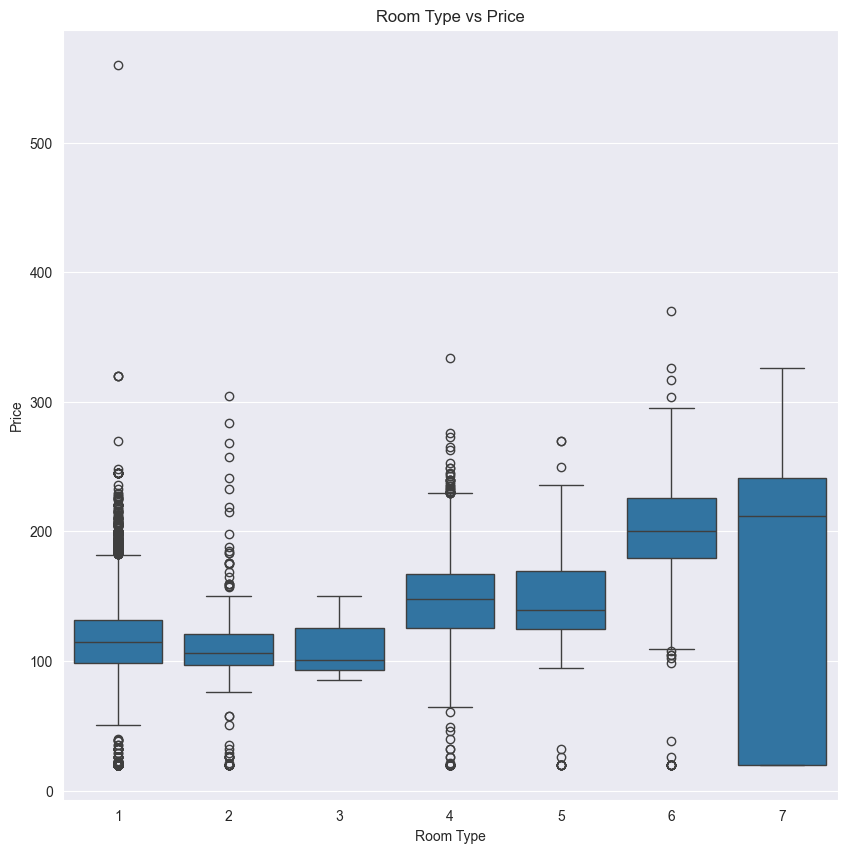

In [72]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

we can see that room 1,2,3 have the same price range, and also rooms 4,5, 6 has higher price, but room 7 price looks strange, lets further investigate

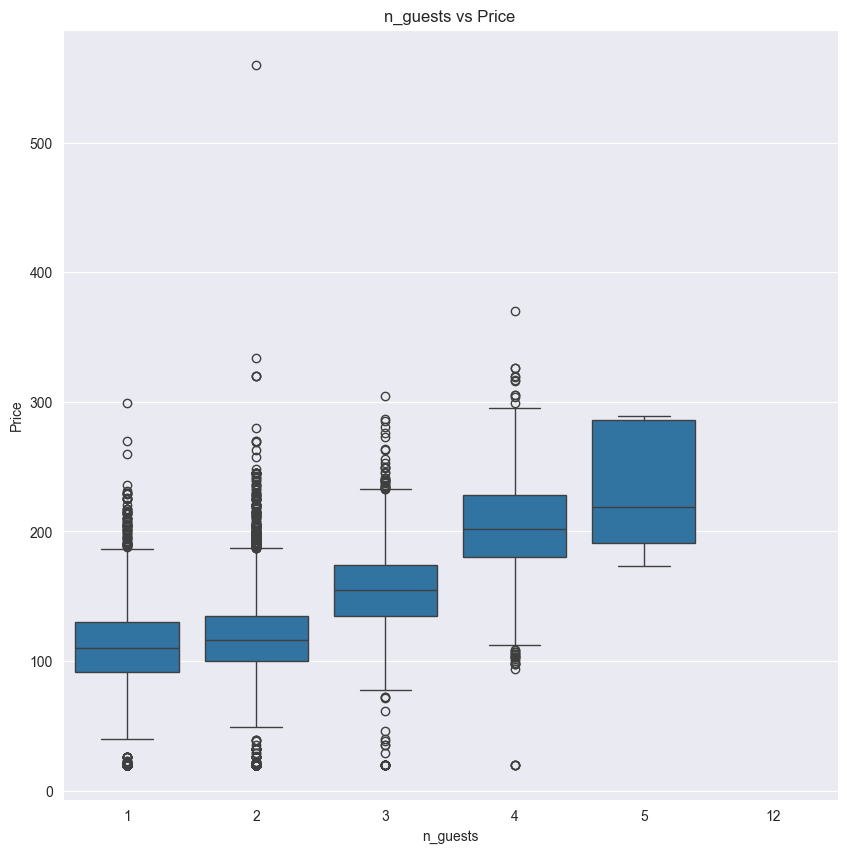

In [73]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='n_guests', y='price', data=df)
plt.title('n_guests vs Price')
plt.xlabel('n_guests')
plt.ylabel('Price')
plt.savefig('plots/n_guests_vs_price.png')
plt.show()

lets fill the nan values of price by the mean of the room type and n_guests median

In [74]:
df['room_type'].value_counts()

room_type
1    21084
4     4571
6      741
2      511
5      180
7      123
3        3
Name: count, dtype: int64

In [75]:
df['room_type'] = df["room_type"].replace(3, 2)

In [76]:

table = df.pivot_table(values='price', index='room_type', columns='n_guests', aggfunc='median')
table

n_guests,1,2,3,4,5
room_type,,,,,
1,107.500,114.500,140.000,166.700,NaN
2,99.620,105.290,98.940,115.000,NaN
4,130.000,138.000,164.185,171.235,NaN
5,126.000,140.375,137.450,157.700,NaN
6,188.665,176.650,191.000,203.485,194.675
7,20.000,20.000,219.820,234.750,286.300


In [77]:
df['price'] = df['price'].fillna(df.groupby(['room_type', 'n_guests'])['price'].transform('median'))

In [78]:
df.isnull().sum()

ID                              0
weekend_nights                  0
week_nights                     0
room_type                       0
board_type                      0
n_adults                        0
n_less_12                       0
n_more_12                       0
booked_tour                     0
n_requests                      0
lead_time                     419
purchase_type                   0
n_p_cacellation                 0
n_p_not_cacellation             0
repeated                        0
price                           2
date                            0
is_canceled                     0
month_order                     0
n_guests                        0
total_nights                    0
has_kids                        0
previous_cancellation_rate      0
dtype: int64

In [79]:
df['price'] = df['price'].fillna(df['price'].median())

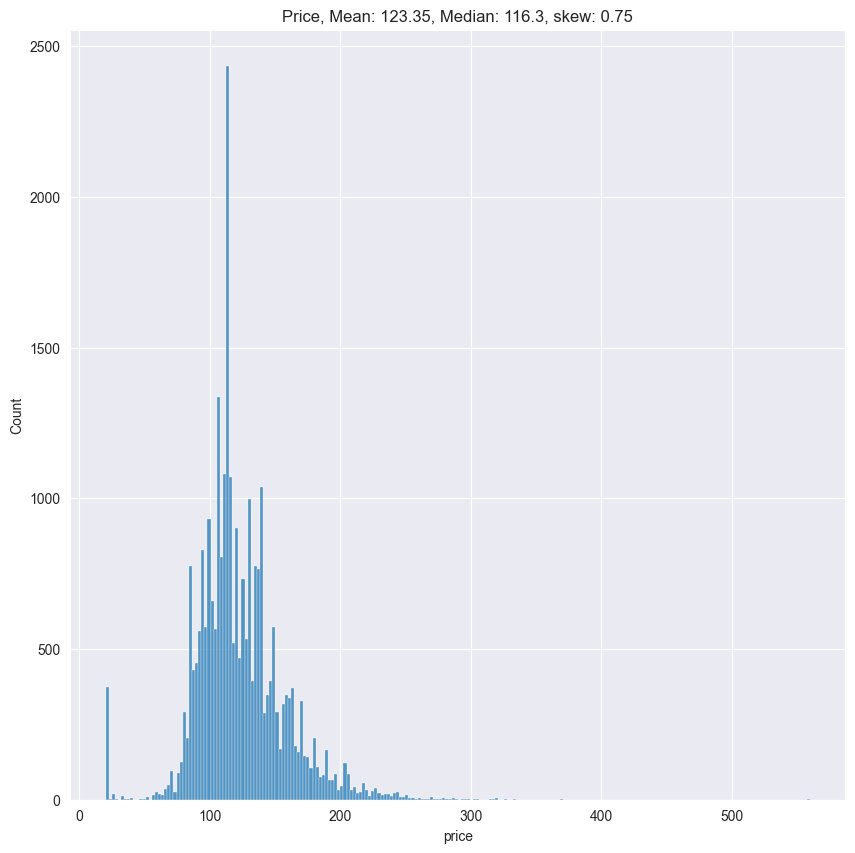

In [80]:
plt.figure(figsize = (10, 10))
sns.histplot(df['price'])
plt.title('Price, Mean: {}, Median: {}, skew: {}'.format(round(df['price'].mean(), 2), round(df['price'].median(), 2), round(df['price'].skew(), 2)))
plt.show()

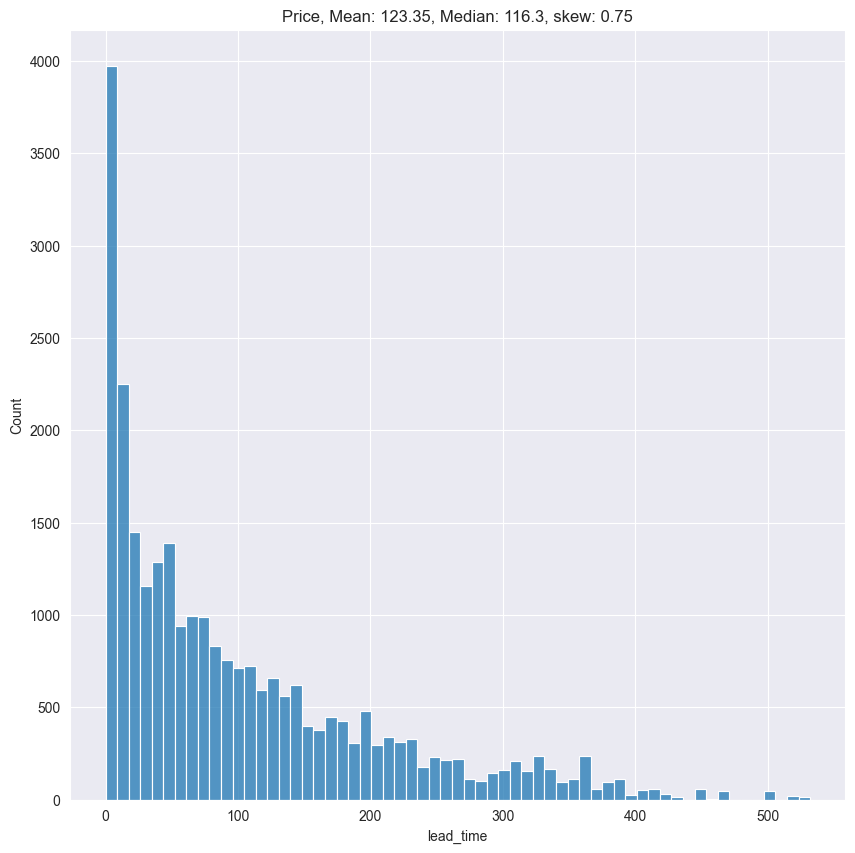

In [81]:
plt.figure(figsize = (10, 10))
sns.histplot(df['lead_time'])
plt.title('Price, Mean: {}, Median: {}, skew: {}'.format(round(df['price'].mean(), 2), round(df['price'].median(), 2), round(df['price'].skew(), 2)))
plt.show()

lets fill missing value with the median

In [82]:
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].median())

In [83]:
df.isnull().sum().sum()

0

In [84]:
df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')
df['check_in_day'] = df['check_in_date'].dt.day_name().astype('category')
df['check_in_month'] = df['check_in_date'].dt.month
df['is_holiday_season'] = np.where(df['check_in_month'].isin([12, 1, 7, 8]), 1, 0)
df['board_type'] = df['board_type'].astype('category')
df['purchase_type'] = df['purchase_type'].astype('category')
df['has_kids'] = df['has_kids'].astype('category')
df['repeated'] = df['repeated'].astype('category')
df['check_in_month'] = df['check_in_month'].astype('category')
df['is_holiday_season'] = df['is_holiday_season'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['month_order'] = df['month_order'].astype('category')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          27213 non-null  object        
 1   weekend_nights              27213 non-null  int64         
 2   week_nights                 27213 non-null  int64         
 3   room_type                   27213 non-null  category      
 4   board_type                  27213 non-null  category      
 5   n_adults                    27213 non-null  int64         
 6   n_less_12                   27213 non-null  int64         
 7   n_more_12                   27213 non-null  int64         
 8   booked_tour                 27213 non-null  int64         
 9   n_requests                  27213 non-null  int64         
 10  lead_time                   27213 non-null  float64       
 11  purchase_type               27213 non-null  category  

# Data Normalization

In [154]:
df = pd.read_csv('hotels_train.csv')
df['room_type'] = df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)
df['date'] = df['date'].replace('2018-2-29', '2018-3-1')
df['date'] = pd.to_datetime(df['date'], format = 'mixed')
df['month_order'] = df['date'].dt.month.astype(int)
df['n_guests'] = df['n_adults'] + df['n_less_12'] + df['n_more_12']
df['is_canceled'] = df['is_canceled'].astype('category')
df['total_nights'] = df['weekend_nights'] + df['week_nights']
df['has_kids'] = ((df['n_less_12'] > 0) | (df['n_more_12'] > 0)).astype(int)
df['previous_cancellation_rate'] = (df['n_p_cacellation'] / (df['n_p_cacellation'] + df['n_p_not_cacellation'])).round(2)
df['previous_cancellation_rate'] = df['previous_cancellation_rate'].fillna(0)
df['board_type'] = df['board_type'].fillna('not selected')
df['purchase_type'] = df['purchase_type'].fillna('Missing')
df['room_type'] = df["room_type"].replace(3, 2)
df['price'] = df['price'].fillna(df.groupby(['room_type', 'n_guests'])['price'].transform('median'))
df['price'] = df['price'].fillna(df['price'].median())
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].median())
df['check_in_date'] = df['date'] + pd.to_timedelta(df['lead_time'], unit='d')
df['check_in_day'] = df['check_in_date'].dt.day_name().astype('category')
df['check_in_month'] = df['check_in_date'].dt.month
df['board_type'] = df['board_type'].astype('category')
df['purchase_type'] = df['purchase_type'].astype('category')
df['has_kids'] = df['has_kids'].astype('category')
df['repeated'] = df['repeated'].astype('category')
df['check_in_month'] = df['check_in_month'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['month_order'] = df['month_order'].astype('category')
df['booked_tour'] = df['booked_tour'].astype('category')
df = df.drop(['ID', 'date', 'check_in_date','n_p_cacellation','n_p_not_cacellation'], axis=1)


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   weekend_nights              27213 non-null  int64   
 1   week_nights                 27213 non-null  int64   
 2   room_type                   27213 non-null  category
 3   board_type                  27213 non-null  category
 4   n_adults                    27213 non-null  int64   
 5   n_less_12                   27213 non-null  int64   
 6   n_more_12                   27213 non-null  int64   
 7   booked_tour                 27213 non-null  category
 8   n_requests                  27213 non-null  int64   
 9   lead_time                   27213 non-null  float64 
 10  purchase_type               27213 non-null  category
 11  repeated                    27213 non-null  category
 12  price                       27213 non-null  float64 
 13  is_canceled     

In [156]:
test = pd.read_csv('hotels_test.csv')

In [157]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9072 non-null   object 
 1   weekend_nights       9072 non-null   int64  
 2   week_nights          9072 non-null   int64  
 3   room_type            9072 non-null   object 
 4   board_type           6355 non-null   object 
 5   n_adults             9072 non-null   int64  
 6   n_less_12            9072 non-null   int64  
 7   n_more_12            9072 non-null   int64  
 8   booked_tour          9072 non-null   int64  
 9   n_requests           9072 non-null   int64  
 10  lead_time            8947 non-null   float64
 11  purchase_type        7461 non-null   object 
 12  n_p_cacellation      9072 non-null   int64  
 13  n_p_not_cacellation  9072 non-null   int64  
 14  repeated             9072 non-null   int64  
 15  price                7942 non-null   f

In [158]:
df

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,...,repeated,price,is_canceled,month_order,n_guests,total_nights,has_kids,previous_cancellation_rate,check_in_day,check_in_month
0,1,5,1,half board,2,0,0,0,2,34.0,...,0,108.4,0,11,2,6,0,0.0,Tuesday,1
1,0,3,1,not selected,2,0,0,0,0,365.0,...,0,114.5,1,11,2,3,0,0.0,Sunday,11
2,0,2,4,half board,1,0,0,0,1,148.0,...,0,137.3,0,5,1,2,0,0.0,Monday,10
3,1,2,1,not selected,2,0,0,0,0,502.0,...,0,127.0,1,9,2,3,0,0.0,Monday,2
4,1,3,4,half board,2,0,1,0,2,32.0,...,0,110.0,0,10,3,4,1,0.0,Monday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,1,not selected,3,0,0,0,1,106.0,...,0,140.0,0,7,3,3,0,0.0,Thursday,11
27209,0,4,1,half board,2,0,0,0,1,18.0,...,0,113.0,0,2,2,4,0,0.0,Wednesday,3
27210,0,2,1,not selected,2,0,0,0,0,147.0,...,0,105.0,1,4,2,2,0,0.0,Sunday,9
27211,1,0,4,half board,1,0,0,0,0,3.0,...,0,130.0,1,5,1,1,0,0.0,Friday,5


In [159]:
table = df.groupby(['room_type', 'n_guests'], observed=True)['price'].transform('median')

In [160]:
test = pd.read_csv('hotels_test.csv')
print(test.shape)
test['room_type'] = test['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)
test['date'] = test['date'].replace('2018-2-29', '2018-3-1')
test['date'] = pd.to_datetime(test['date'], format = 'mixed')
test['month_order'] = test['date'].dt.month.astype(int)
test['n_guests'] = test['n_adults'] + test['n_less_12'] + test['n_more_12']
test['total_nights'] = test['weekend_nights'] + test['week_nights']
test['has_kids'] = ((test['n_less_12'] > 0) | (test['n_more_12'] > 0)).astype(int)
test['previous_cancellation_rate'] = (test['n_p_cacellation'] / (test['n_p_cacellation'] + test['n_p_not_cacellation'])).round(2)
test['previous_cancellation_rate'] = test['previous_cancellation_rate'].fillna(0)
test['board_type'] = test['board_type'].fillna('not selected')
test['purchase_type'] = test['purchase_type'].fillna('Missing')
test['room_type'] = test["room_type"].replace(3, 2)
test['price'] = test['price'].fillna(table)
test['price'] = test['price'].fillna(df['price'].median())
test['lead_time'] = test['lead_time'].fillna(df['lead_time'].median())
test['check_in_date'] = test['date'] + pd.to_timedelta(test['lead_time'], unit='d')
test['check_in_day'] = test['check_in_date'].dt.day_name().astype('category')
test['check_in_month'] = test['check_in_date'].dt.month
test['board_type'] = test['board_type'].astype('category')
test['purchase_type'] = test['purchase_type'].astype('category')
test['has_kids'] = test['has_kids'].astype('category')
test['repeated'] = test['repeated'].astype('category')
test['check_in_month'] = test['check_in_month'].astype('category')
test['room_type'] = test['room_type'].astype('category')
test['month_order'] = test['month_order'].astype('category')
test['booked_tour'] = test['booked_tour'].astype('category')
test = test.drop(['ID', 'date', 'check_in_date','n_p_cacellation','n_p_not_cacellation'], axis=1)


(9072, 17)


In [161]:
test.isnull().sum()

weekend_nights                0
week_nights                   0
room_type                     0
board_type                    0
n_adults                      0
n_less_12                     0
n_more_12                     0
booked_tour                   0
n_requests                    0
lead_time                     0
purchase_type                 0
repeated                      0
price                         0
month_order                   0
n_guests                      0
total_nights                  0
has_kids                      0
previous_cancellation_rate    0
check_in_day                  0
check_in_month                0
dtype: int64

In [162]:
y = df['is_canceled']
df = df.drop('is_canceled', axis=1)

In [163]:
X_train, y_train = df ,y


In [164]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize_data(df, test, scaler):
    # Initialize scalers and encoders
    # scaler = StandardScaler()
    
    # Separate columns by type
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['category']).columns
    
    # Normalize numeric columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    test[numeric_cols] = scaler.transform(test[numeric_cols])

    df = pd.get_dummies(df, columns=categorical_cols)
    test = pd.get_dummies(test, columns=categorical_cols)
    
    return df , test

In [165]:
df_encoded_min_max, test_encoded_min_max = normalize_data(X_train, test, MinMaxScaler())
df_encoded_std, test_encoded_std = normalize_data(X_train, test, StandardScaler())

In [124]:
print(df_encoded_min_max.shape)
print(test_encoded_min_max.shape)
print(df_encoded_std.shape)
print(test_encoded_std.shape)


(27213, 64)
(9072, 64)
(27213, 64)
(9072, 64)


In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score, roc_curve, roc_auc_score

def train_model(model, df, y, cv=5 ,X_val=None, y_val=None):
    # Split the data into training and validation sets
    if X_val is None and y_val is None:
        X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)
    else:
        X_train = df
        y_train = y
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the target
    y_pred_val = model.predict(X_val)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model on training and validation sets
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    conf_matrix = confusion_matrix(y_val, y_pred_val)
    
    f1 = f1_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    
    # Print the evaluation metrics
    print('Accuracy Train:', accuracy_train)
    print('Accuracy Val:', accuracy_val)
    print('Confusion Matrix:', conf_matrix)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, df, y, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std() * 2})')
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('True', fontsize=16)
    plt.title(f'F1: {round(f1, 3)}, Precision: {round(precision, 3)}, Recall: {round(recall, 3)}, Acc: {round(accuracy_val, 3)}, Train Acc: {round(accuracy_train, 3)}, CV Acc: {round(cv_scores.mean(), 3)}', fontsize=16)
    plt.savefig(f"plots/confusion_matrix_{model.__class__.__name__}.png")
    # Compute ROC curve and ROC area for validation set
    y_prob_val = model.predict_proba(X_val)[:, 1]  # Get the probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_val, y_prob_val)
    roc_auc = roc_auc_score(y_val, y_prob_val)
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.savefig(f"plots/roc_curve_{model.__class__.__name__}.png")
    plt.show()



In [126]:
from sklearn.model_selection import cross_validate
def train_model_with_cross_validation(model,df,y):
    cv_results = cross_validate(model, df, y, cv=10, scoring='accuracy',return_train_score=True)
    
    return  pd.DataFrame(cv_results)
    

Accuracy Train: 0.4373909049150207
Accuracy Val: 0.42623553187580376
Confusion Matrix: [[ 588 3071]
 [  52 1732]]
Cross-Validation Accuracy: 0.4324035409434841 (+/- 0.012726020153570265)


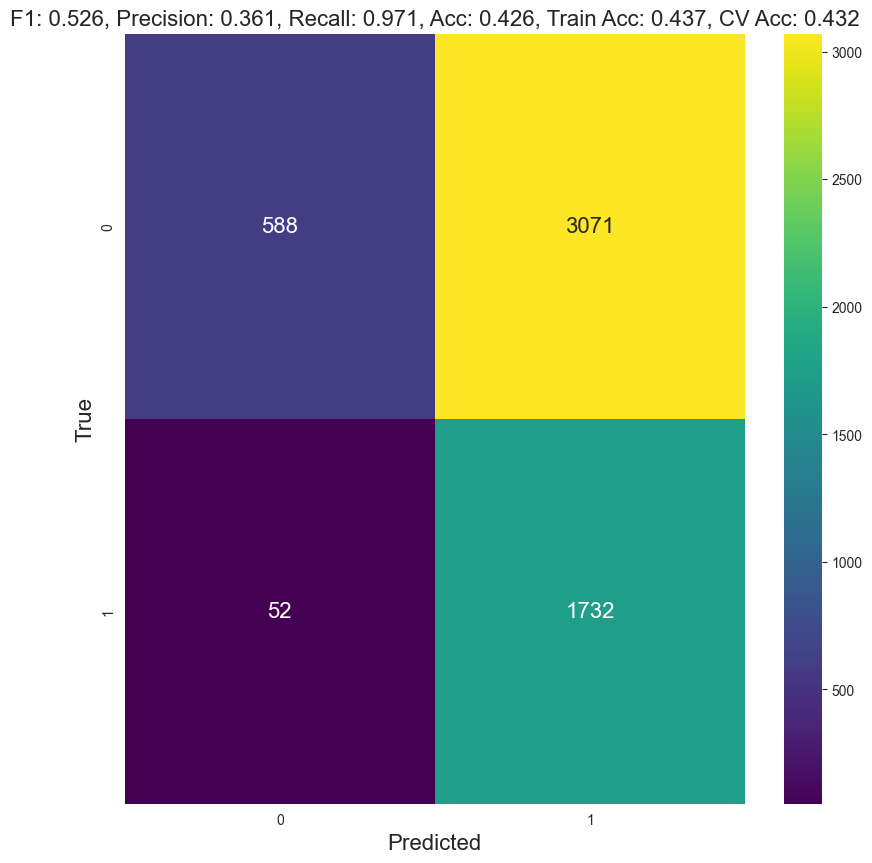

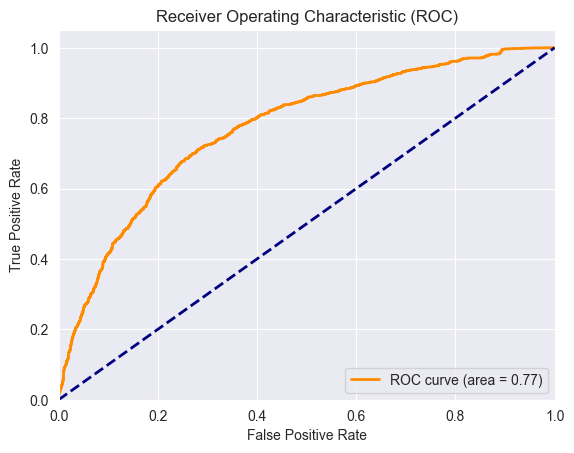

In [161]:
from sklearn.naive_bayes import GaussianNB


GNB_model = GaussianNB()
train_model(GNB_model, df_encoded_std,y_train)



In [128]:
results = train_model_with_cross_validation(GNB_model, df_encoded_std,y_train)
results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.211633,0.024340,0.431889,0.432526
std,0.124139,0.007641,0.005832,0.001569
min,0.120695,0.014000,0.418810,0.429586
25%,0.129734,0.019643,0.430540,0.432376
50%,0.158167,0.024513,0.431275,0.432794
75%,0.251574,0.025762,0.435462,0.433391
max,0.525153,0.042532,0.441014,0.434690


Accuracy Train: 0.726182820395039
Accuracy Val: 0.7288260150652214
Confusion Matrix: [[3433  226]
 [1250  534]]
Cross-Validation Accuracy: 0.7246903814838801 (+/- 0.011984109258772765)


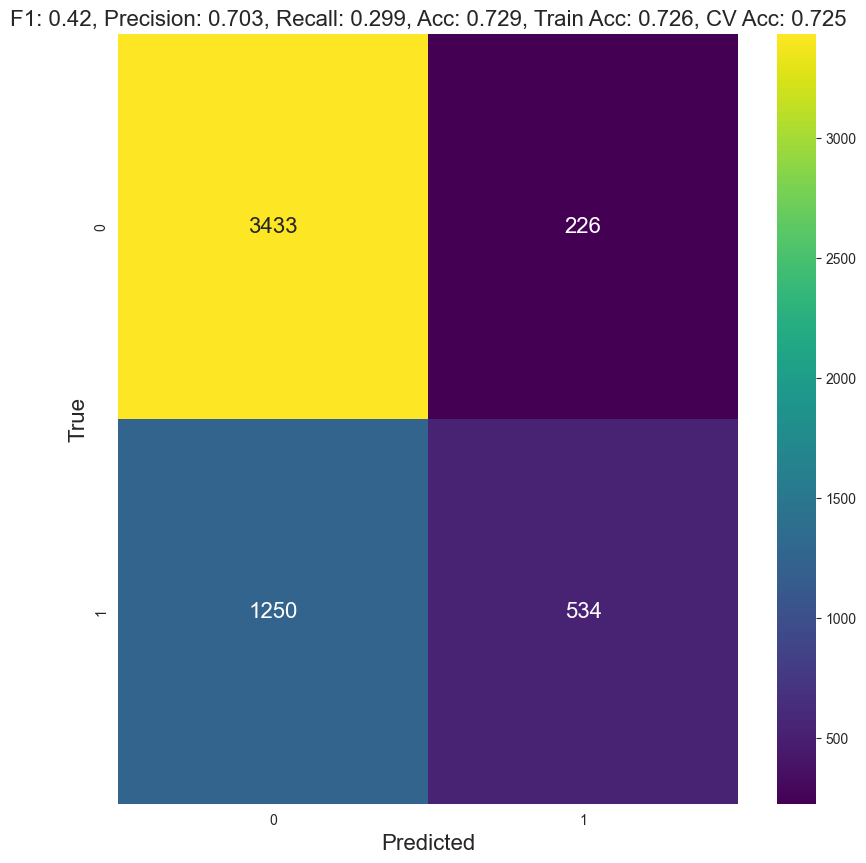

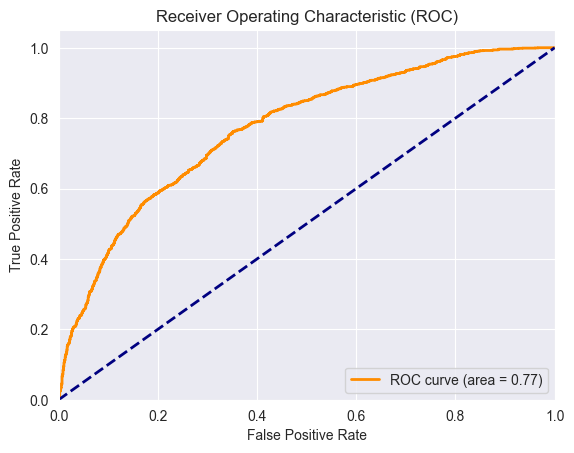

In [162]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB(alpha=0.25)
train_model(MNB_model, df_encoded_min_max,y_train)

In [130]:
MNB_model = MultinomialNB()
results = train_model_with_cross_validation(MNB_model, df_encoded_min_max,y_train)
results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.758141,0.015339,0.723919,0.725736
std,1.562670,0.003750,0.007329,0.001224
min,0.065543,0.013000,0.713341,0.723787
25%,0.074796,0.013002,0.718655,0.724788
50%,0.076542,0.013503,0.722212,0.725808
75%,0.400998,0.016400,0.730798,0.726545
max,5.023966,0.025002,0.733921,0.727818


100%|██████████| 19/19 [00:19<00:00,  1.02s/it]


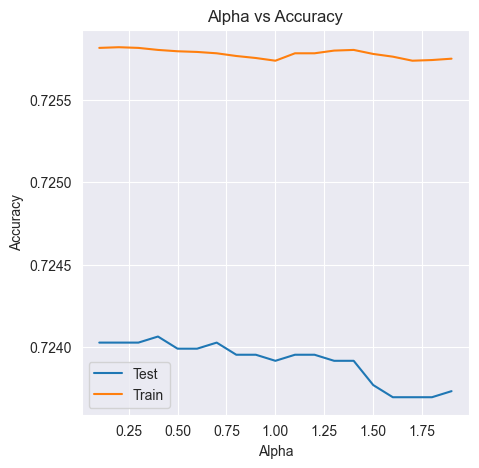

In [140]:
from tqdm import tqdm
test_mean_accuracy = []
train_mean_accuracy = []
alpha_array = np.arange(0.1, 2, 0.1)
for alpha in tqdm(alpha_array):
    MNB_model = MultinomialNB(alpha=alpha)
    results = train_model_with_cross_validation(MNB_model, df_encoded_min_max,y_train)
    test_mean_accuracy.append(results['test_score'].mean())
    train_mean_accuracy.append(results['train_score'].mean())
plt.figure(figsize=(5, 5))
plt.plot(alpha_array, test_mean_accuracy, label='Test')
plt.plot(alpha_array, train_mean_accuracy, label='Train')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')
plt.legend()
plt.savefig('plots/alpha_vs_accuracy.png')

we can see that the best alpha is 0.1

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT_model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20]
}
grid_search = GridSearchCV(DT_model, param_grid, cv=10, scoring='accuracy', verbose=10, return_train_score = True, n_jobs=-1)
grid_search.fit(df_encoded_std, y_train)
best_params_DT = grid_search.best_params_


Fitting 10 folds for each of 96 candidates, totalling 960 fits


Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15}
Best Score Test: 0.8549958671783211
Best Score Train: 0.8895748549399298
Accuracy Train: 0.8915480018373909
Accuracy Val: 0.860738563292302
Confusion Matrix: [[3332  327]
 [ 431 1353]]
Cross-Validation Accuracy: 0.8555838187812375 (+/- 0.011762215900763238)


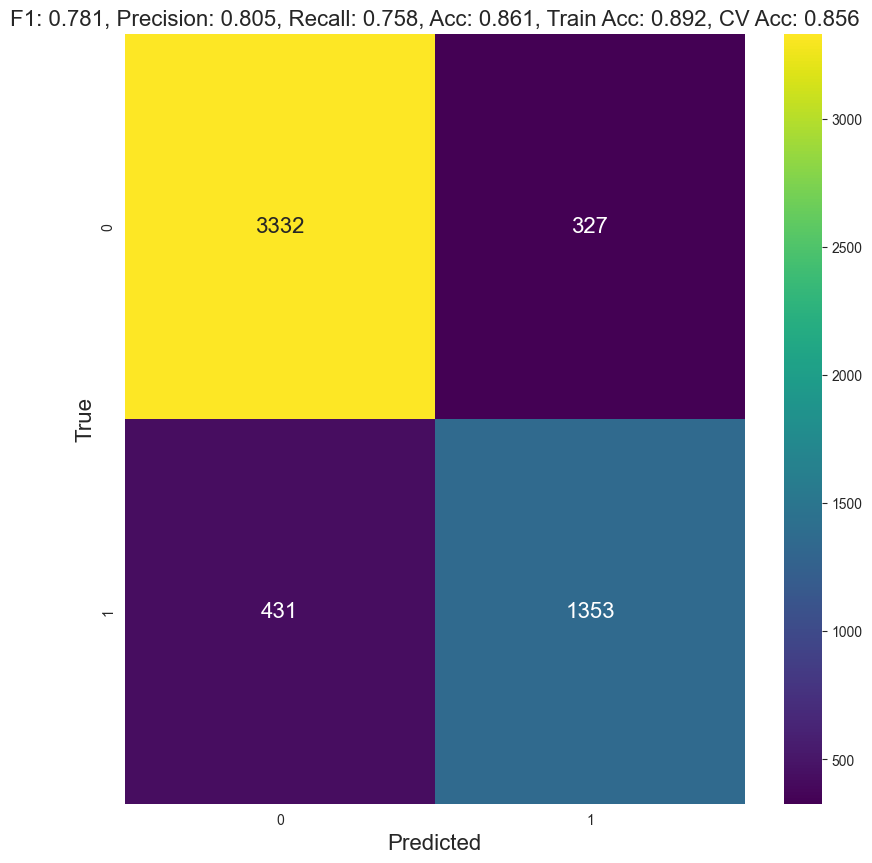

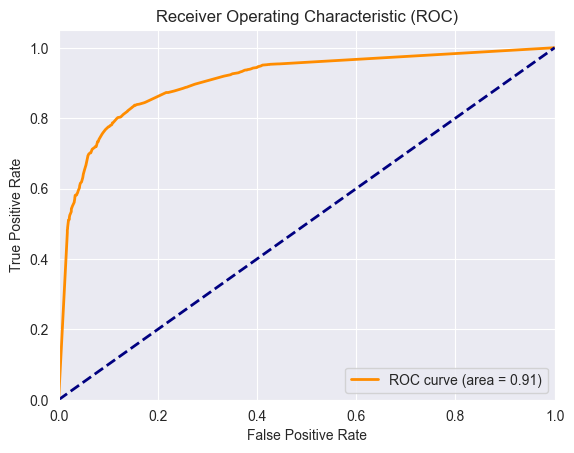

In [163]:
best_score_test = grid_search.best_score_
print('Best Params:', grid_search.best_params_)
best_score_train = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
print('Best Score Test:', best_score_test)
print('Best Score Train:', best_score_train)

train_model(grid_search.best_estimator_, df_encoded_std, y_train, cv=10)

In [148]:
import os

def save_results(results, model_name):
    results_to_save = pd.DataFrame(results)

    file_path = f'{results_dir_path}/{model_name}_results.csv'

    # Check if the file exists
    if os.path.exists(file_path):
        # Append to the file without writing the header
        results_to_save.to_csv(file_path, mode='a', header=False, index=False)
    else:
        # Write to a new file including the header
        results_to_save.to_csv(file_path, mode='w', header=True, index=False)

    print(f'Results saved to {model_name}_results.csv')



In [135]:
columns = [ 'mean_test_score', 'mean_train_score', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

In [167]:
save_results(table_results, 'DecisionTree')

Results saved to DecisionTree_results.csv


In [168]:
from xgboost import XGBClassifier

# Define the XGBoost model
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [300, 400],
    'learning_rate': [0.1, 0.2],
    'max_depth': [ 6, 8],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=10, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(df_encoded_std, y_train)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost')

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Results saved to XGBoost_results.csv


In [169]:
best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(df_encoded_std, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
best_params_XGB

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 0.4620058036441327, 'colsample_bytree': 0.9841850018835445, 'eta': 0.025335140311608023, 'gamma': 0.2931149160083986, 'lambda': 0.505888678884466, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 722, 'subsample': 0.9178286758187202}
Accuracy Train: 0.9724391364262747
Accuracy Val: 0.8859085063384163
Confusion Matrix: [[3439  220]
 [ 401 1383]]
Cross-Validation Accuracy: 0.8813801690608958 (+/- 0.008394000771369184)


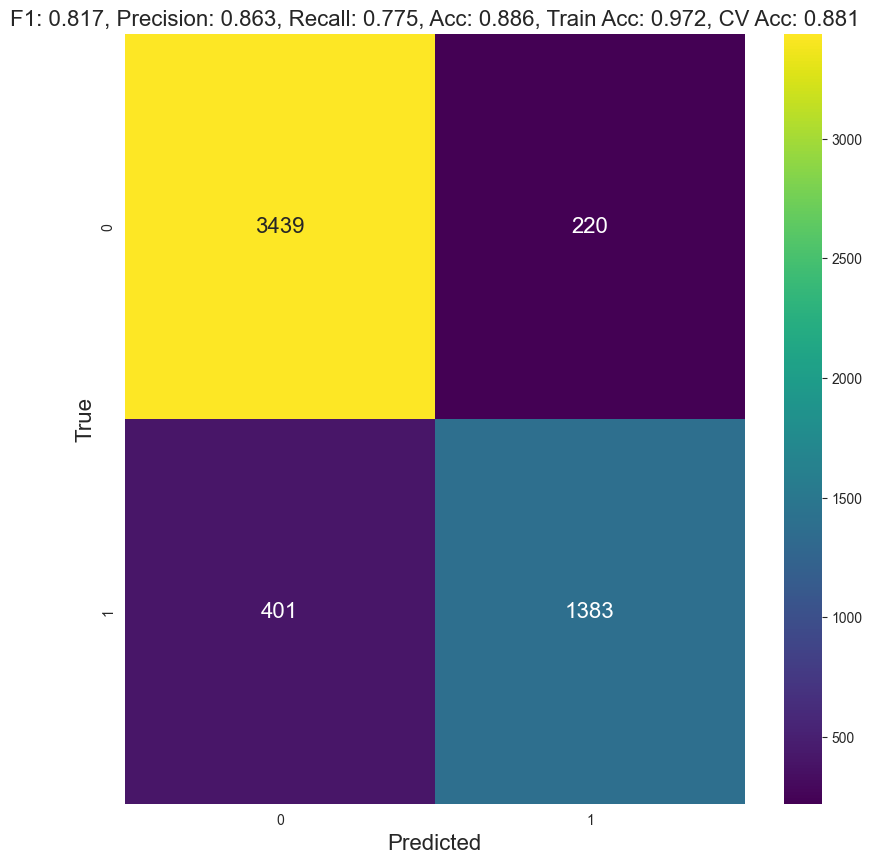

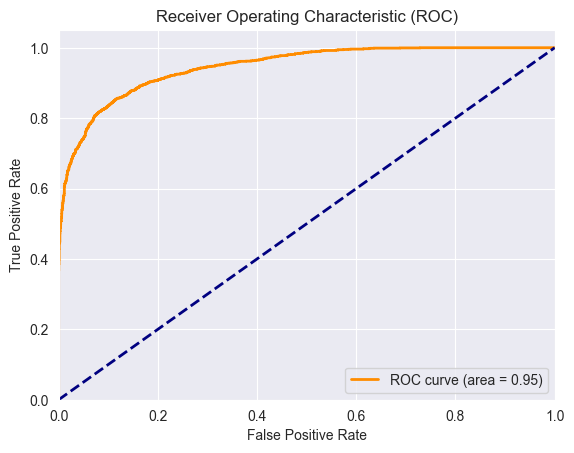

In [178]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'eta': uniform(0.01, 0.1),
    'max_depth': randint(3, 12),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 1000),
    'gamma': uniform(0, 0.5),
    'lambda': uniform(0, 1),
    'alpha': uniform(0, 1),
    'min_child_weight': randint(1, 10),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(df_encoded_std, y_train)

# Get the best model
best_model = random_search.best_estimator_

best_params_XGB = random_search.best_params_

# Print the best parameters
print(random_search.best_params_)

# Train the best model
train_model(best_model, df_encoded_std, y_train)

In [149]:
# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score','mean_train_score', 'param_eta', 'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_n_estimators', 'param_gamma', 'param_lambda', 'param_alpha', 'param_min_child_weight']

table_results = pd.DataFrame(random_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_random_search')

Results saved to XGBoost_random_search_results.csv


Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 0.3745401188473625, 'colsample_bytree': 0.9852142919229747, 'eta': 0.0831993941811405, 'gamma': 0.2993292420985183, 'lambda': 0.15601864044243652, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 430, 'subsample': 0.8377746675897602}
Accuracy Train: 0.9008727606798347
Accuracy Val: 0.8820503398860923
Confusion Matrix: [[3442  217]
 [ 425 1359]]
Cross-Validation Accuracy: 0.8722670071840719 (+/- 0.006453135156022428)


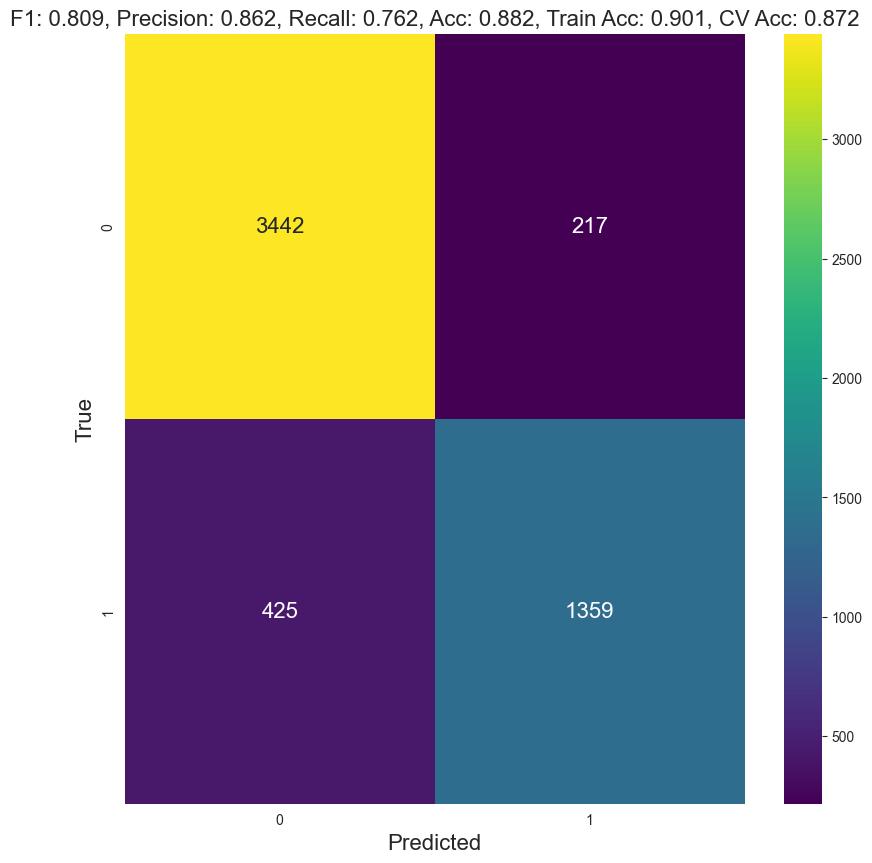

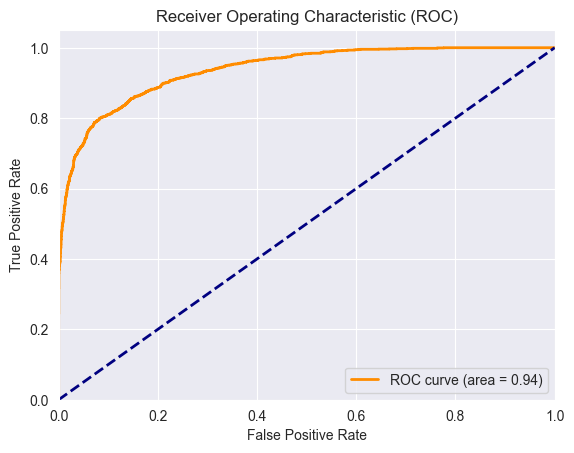

KeyError: "['mean_train_score', 'param_learning_rate'] not in index"

In [150]:
from imblearn.over_sampling import ADASYN

df_encoded_std_train, val_encoded_std, y_train_, y_val = train_test_split(df_encoded_std, y_train, test_size=0.2, random_state=42, stratify=y_train)
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(df_encoded_std_train, y_train_)
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_dist = {
    'eta': uniform(0.01, 0.1),
    'max_depth': randint(3, 12),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 1000),
    'gamma': uniform(0, 0.5),
    'lambda': uniform(0, 1),
    'alpha': uniform(0, 1),
    'min_child_weight': randint(1, 10),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=param_dist,
    n_iter=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(df_encoded_std, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Print the best parameters
print(random_search.best_params_)

# Train the best model
train_model(best_model, df_encoded_std, y_train)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(random_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_ADASYN_random_search')


In [ ]:
table_results

In [ ]:
best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(X_res, y_res)
y_pred = XGB_model.predict(val_encoded_std)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy:{accuracy:.4f}')

In [ ]:
y_train.value_counts()

In [ ]:
y_res.value_counts()

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_resampled, y_resampled = tl.fit_resample(df_encoded_std_train, y_train_)
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.1],
    'max_depth': [8, 10],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=10, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_TomekLinks')

In [ ]:
best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(X_resampled, y_resampled )
y_pred = XGB_model.predict(val_encoded_std)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy:{accuracy:.4f}')

In [ ]:
ada = ADASYN(random_state=42, sampling_strategy=1)
X_res, y_res = ada.fit_resample(df_encoded_std_train, y_train_)
y_res.value_counts()

In [ ]:
tl = TomekLinks(sampling_strategy='all')
X_resampled, y_resampled = tl.fit_resample(X_res, y_res)
y_resampled.value_counts()

In [ ]:

XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.1],
    'max_depth': [8],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=10, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_TomekLinks_ADASYN')

In [ ]:
best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(X_resampled, y_resampled )
y_pred = XGB_model.predict(val_encoded_std)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy:{accuracy:.4f}')

In [ ]:
table_results

In [173]:
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

df_encoded_std_train, val_encoded_std, y_train_, y_val = train_test_split(df_encoded_std, y_train, test_size=0.2, random_state=42, stratify=y_train)

st = SMOTETomek(sampling_strategy=1)
X_resampled, y_resampled = st.fit_resample(df_encoded_std_train, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'alpha': 0.4620058036441327, 'colsample_bytree': 0.9841850018835445, 'eta': 0.025335140311608023, 'gamma': 0.2931149160083986, 'lambda': 0.505888678884466, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 722, 'subsample': 0.9178286758187202}
Accuracy Train: 0.985662583518931
Accuracy Val: 0.8813154510380306
Confusion Matrix: [[3404  255]
 [ 391 1393]]
Cross-Validation Accuracy: 0.9124109955888757 (+/- 0.06971730372360668)


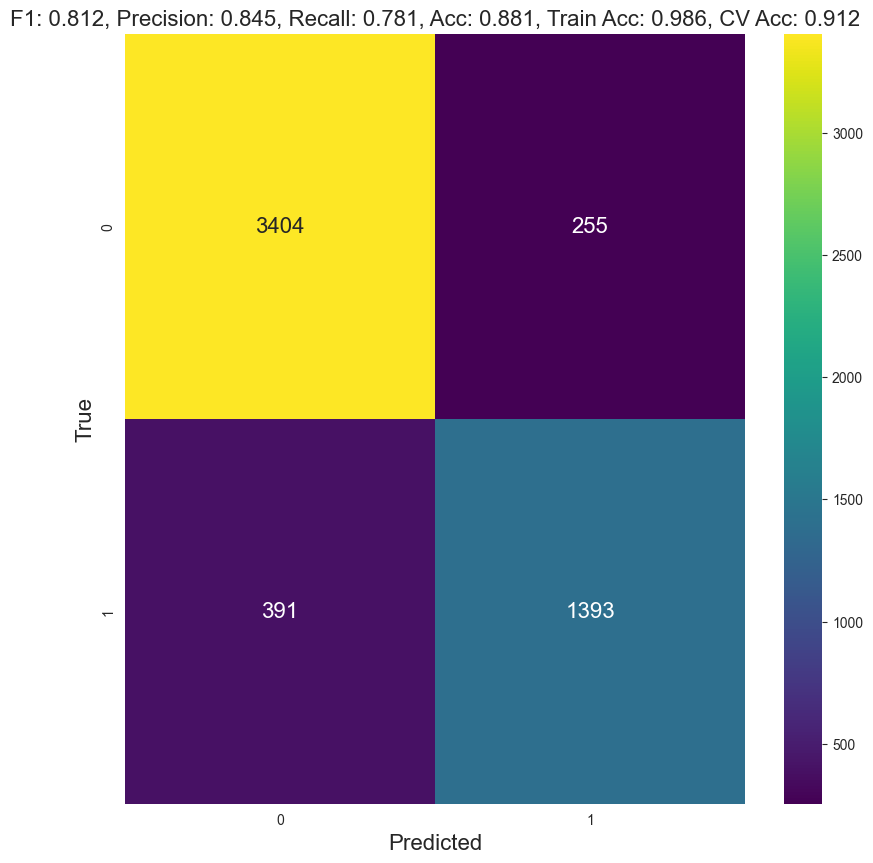

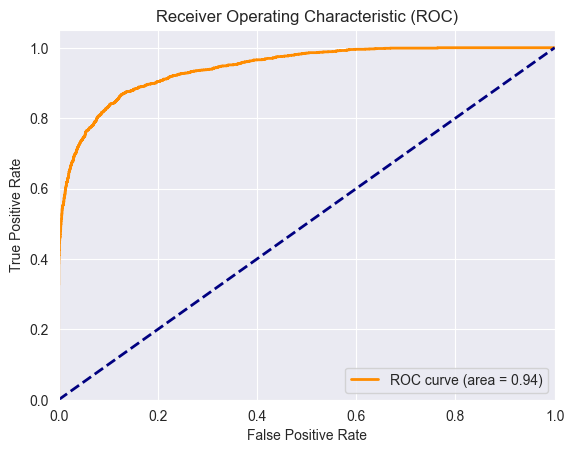

Results saved to XGBoost_smotet_tomek_random_search_results.csv


In [175]:
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
param_dist = {
    'eta': uniform(0.01, 0.1),
    'max_depth': randint(3, 12),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'n_estimators': randint(100, 1000),
    'gamma': uniform(0, 0.5),
    'lambda': uniform(0, 1),
    'alpha': uniform(0, 1),
    'min_child_weight': randint(1, 10),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    XGBClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search.fit(X_resampled, y_resampled)

# Get the best model
best_model = random_search.best_estimator_

# Print the best parameters
print(random_search.best_params_)

# Train the best model
train_model(best_model, X_resampled, y_resampled, X_val=val_encoded_std, y_val=y_val)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score','mean_train_score', 'param_eta', 'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_n_estimators', 'param_gamma', 'param_lambda', 'param_alpha', 'param_min_child_weight']

table_results = pd.DataFrame(random_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_smotet_tomek_random_search')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Accuracy Train: 0.9957196547884187
Accuracy Val: 0.8796619511298917
Confusion Matrix: [[3402  257]
 [ 398 1386]]
Cross-Validation Accuracy: 0.911262576377933 (+/- 0.07082311849703024)


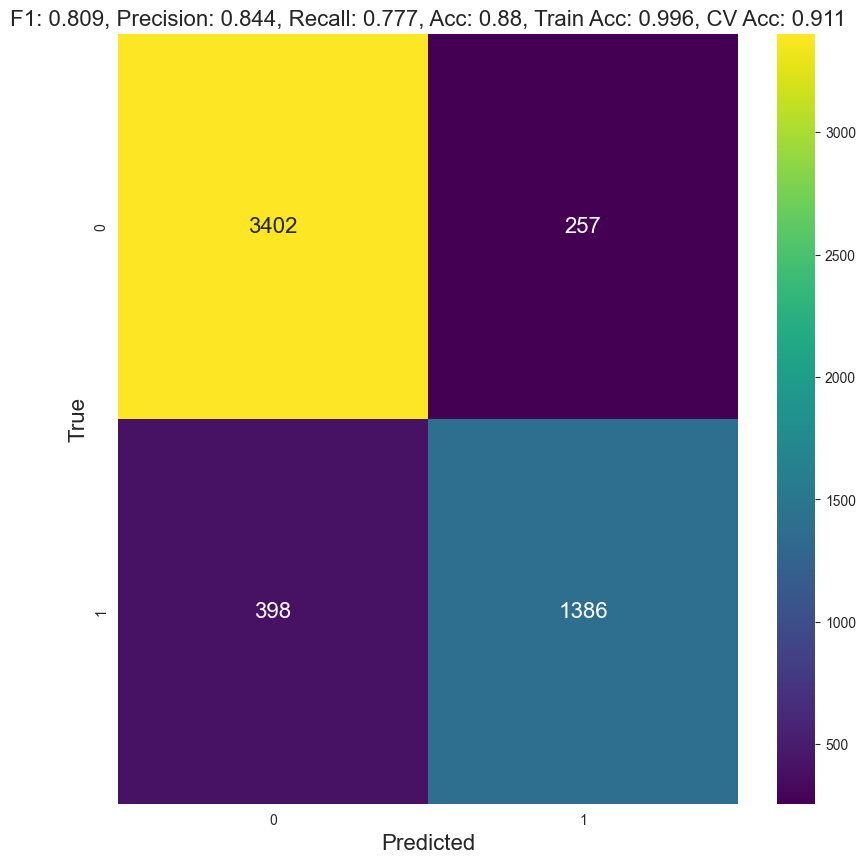

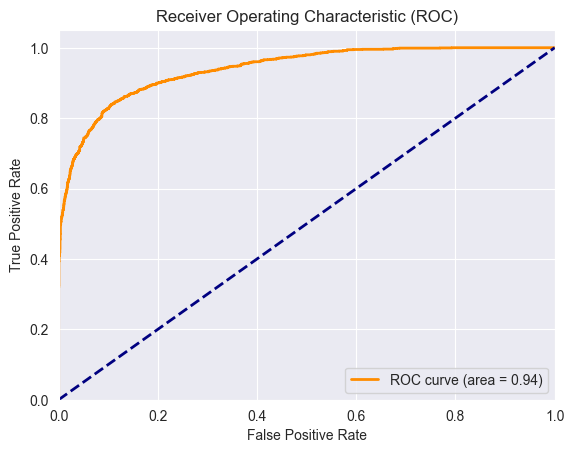

Results saved to XGBoost_SMOTETomek_results.csv


In [176]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [60, 100, 200, 300],
    'learning_rate': [0.1 ,0.05,0.2],
    'max_depth': [6, 8, 10, 12],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=10, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

best_model = grid_search.best_estimator_

# Train the best model
train_model(best_model, X_resampled, y_resampled, X_val=val_encoded_std, y_val=y_val)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_SMOTETomek')

In [106]:
table_results

,mean_test_score,mean_train_score,param_n_estimators,param_learning_rate,param_max_depth,param_subsample,param_colsample_bytree,param_gamma
0,0.869268,0.880653,60,0.1,6,1.0,1.0,0.1
1,0.885105,0.898417,100,0.1,6,1.0,1.0,0.1
2,0.901416,0.918516,200,0.1,6,1.0,1.0,0.1
3,0.906705,0.930181,300,0.1,6,1.0,1.0,0.1
4,0.889002,0.906458,60,0.1,8,1.0,1.0,0.1
5,0.901471,0.922088,100,0.1,8,1.0,1.0,0.1
6,0.912215,0.942765,200,0.1,8,1.0,1.0,0.1
7,0.914192,0.959326,300,0.1,8,1.0,1.0,0.1
8,0.900302,0.926514,60,0.1,10,1.0,1.0,0.1
9,0.909961,0.941973,100,0.1,10,1.0,1.0,0.1


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(X_resampled, y_resampled )
y_pred = XGB_model.predict(val_encoded_std)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy:{accuracy:.4f}')

Validation Accuracy:0.8797


In [ ]:
from imblearn.combine import SMOTEENN
st = SMOTEENN(sampling_strategy=1)
X_resampled, y_resampled = st.fit_resample(df_encoded_std_train, y_train_)
y_resampled.value_counts()

In [ ]:
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.1],
    'max_depth': [8, 10],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=10, scoring='accuracy', verbose=1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate', 
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_SMOTEENN')

In [ ]:
y_resampled.value_counts()
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [60, 100, 200, 300],
    'learning_rate': [0.1 ,0.05,0.2],
    'max_depth': [6, 8, 10, 12],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(XGB_model, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Extract the relevant columns from the cv_results_ and save them
columns = ['mean_test_score', 'mean_train_score', 'param_n_estimators', 'param_learning_rate',
           'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'param_gamma']
table_results = pd.DataFrame(grid_search.cv_results_)[columns]

# Save the results for the XGBoost model
save_results(table_results, 'XGBoost_SMOTEENN_5cv')

In [ ]:
table_results

In [ ]:
best_params_XGB = grid_search.best_params_
XGB_model = XGBClassifier(**best_params_XGB)
XGB_model.fit(X_resampled, y_resampled )
y_pred = XGB_model.predict(val_encoded_std)
y_pred_train = XGB_model.predict(X_resampled)
accuracy = accuracy_score(y_val, y_pred)
accuracy_train = accuracy_score(y_resampled, y_pred_train)
print(f'Validation Accuracy:{accuracy:.4f}')
print(f'Train_Accuracy:{accuracy_train:.4f}')

# statistical significance test

In [187]:
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score, StratifiedKFold

def t_test(model_a, model_b,X, Y):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 
    scores_a = cross_val_score(model_a, X, Y, cv=kf, scoring='accuracy')
    scores_b = cross_val_score(model_b, X, Y, cv=kf, scoring='accuracy')
    t_stat, p_value = ttest_rel(scores_a, scores_b)
    return t_stat, p_value,scores_a,scores_b

In [188]:
xgb_model = XGBClassifier(**best_params_XGB)
dt_model = DecisionTreeClassifier(**best_params_DT)
st = SMOTETomek(sampling_strategy=1)

t_stat, p_value,scores_a,scores_b = t_test(xgb_model, dt_model,df_encoded_std, y_train)

In [183]:
print(f'T-Statistic: {t_stat:.4f}\nP-Value: {p_value:.15f}')
if p_value<0.05:
    print("Therefore reject null hypothesis")
else:
    print("Therefore accept null hypothesis")

T-Statistic: 20.5708
P-Value: 0.000000007082984
Therefore reject null hypothesis


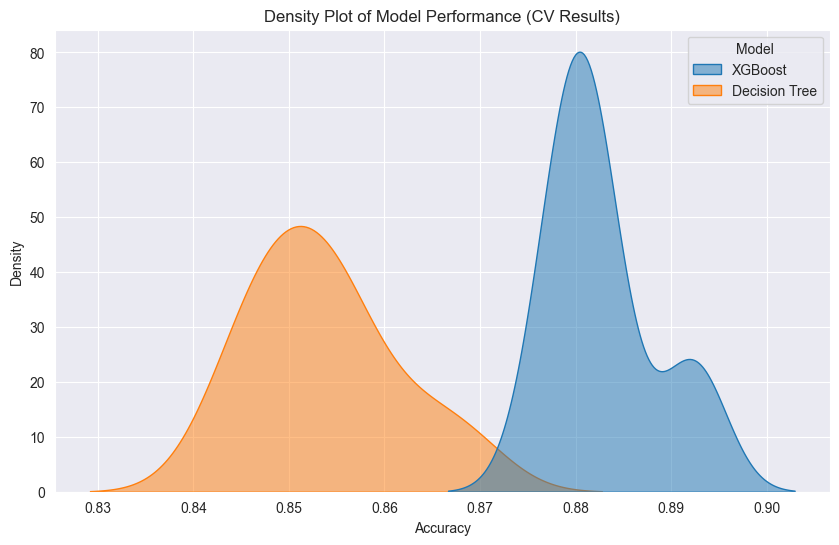

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example CV results (replace these with your actual CV results)
cv_results_model_a = scores_a.tolist()
cv_results_model_b = scores_b.tolist()

# Prepare the data
data = {
    'Model': ['XGBoost'] * len(cv_results_model_a) + ['Decision Tree'] * len(cv_results_model_b),
    'Performance': cv_results_model_a + cv_results_model_b
}

df = pd.DataFrame(data)

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Performance', hue='Model', fill=True, common_norm=False, alpha=0.5)
plt.title('Density Plot of Model Performance (CV Results)')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.savefig('plots/t_test_density_plot.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

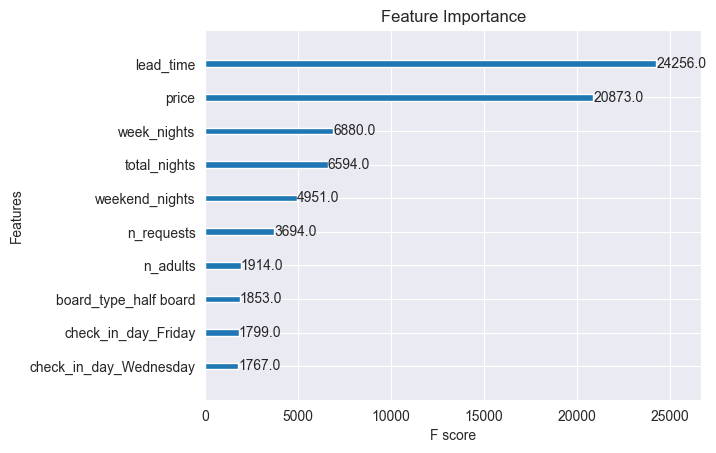

In [210]:
# plot the feature importance
from xgboost import plot_importance
plt.figure(figsize=(10, 10))
plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.savefig('plots/feature_importance.png')
plt.show()

In [204]:
xgb_model = XGBClassifier(**best_params_XGB)
xgb_model.fit(df_encoded_std, y_train)


XGBClassifier(alpha=0.4620058036441327, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9841850018835445, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.025335140311608023, eval_metric=None, feature_types=None,
              gamma=0.2931149160083986, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.505888678884466,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=722, ...)

In [206]:
y_pred = xgb_model.predict(test_encoded_std)

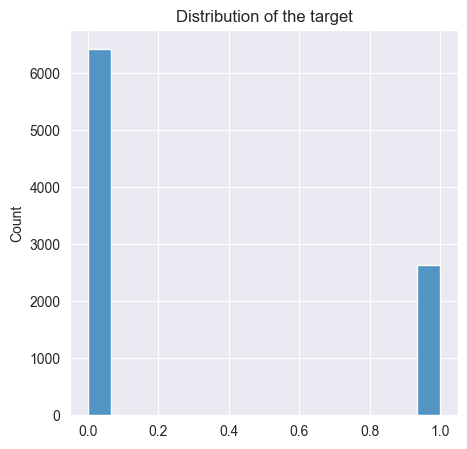

In [212]:
# plot distribution of the target
plt.figure(figsize=(5,5))
sns.histplot(y_pred)
plt.title('Distribution of the target')
plt.savefig('plots/target_distribution.png')
plt.show()

In [216]:
# save the predictions to csv
submission = pd.DataFrame({'is_canceled': y_pred})
submission.to_csv('submission.csv', index=True)